# Case Study - Group 11 (S11)

### Group Members
- **Darylle Xander Calugtong**
- **Graham Joshua Ogatia**
- **Joshua Permito**
- **Shem Matthew Salih**

## Dataset Information
Our chosen dataset is the [Valorant Leaderboard Statistics](https://www.kaggle.com/datasets/aliibrahim10/valorant-stats).
This dataset contains [tracker.gg](https://tracker.gg/) statistics with 80,000+ observations and 38 variables
from **Episode 4: Act 3** (April 2022) of the game **Valorant**.
### Important
The observations in the dataset only contain players who are **Immortal** and **Radiant** rank except for a few players
who were demoted at the time of data collection.
Additionally, only those who consent for the platform [tracker.gg](https://tracker.gg) to gather their statistics have their data in the dataset.
### Collection
The platform [tracker.gg](https://tracker.gg/) collects the data from the game **Valorant**.
This site is a third-party platform that tracks the statistics of players in the game.
It is a third-party platform that is not affiliated with the game developers.

## Dataset Structure
Each row represents a player's statistics in the game **Valorant**.
Each column represents a variable that describes the player's statistics.

### Variables
- `region` - The region of the player.
- `name` - The name of the player. (used together with `tag`)
- `tag` - The tag of the player. (used together with `name`)
- `rating` - The rank of the player.
- `damage_round` - The average damage per round of the player in all matches.
- `headshots` - Total number of headshots of the player in all matches.
- `headshot_percent` - Percentage of total hit shots that are headshots of the player in all matches.
- `aces` - Total number of aces of the player in all matches. An ace is when a player kills all 5 players in the enemy team in a single round.
- `clutches` - Total number of clutches of the player in all matches. A clutch is when a player wins a round when they are the last player alive in their team.
- `flawless` - Total number of flawless rounds of the player in all matches. A flawless round is when a team wins a round without any of their players dying.
- `first_bloods` - Total number of first bloods of the player in all matches.
- `kills` - Total number of kills of the player in all matches.
- `deaths` - Total number of deaths of the player in all matches.
- `assists` - Total number of assists of the player in all matches.
- `kd_ratio` - The kill-death ratio of the player in all matches.
- `kills_round` - Average number of kills per round of the player in all matches.
- `most_kills` - Most number of kills in a single match of the player in all matches.
- `score_round` - Average score per round of the player in all matches.
- `wins` - Total number of wins of the player in all matches.
- `win_percent` - Percentage of total matches won of the player in all matches.
- `agent_1` - Most played agent of the player in all matches based on hours.
- `agent_2` - Second most played agent of the player in all matches based on hours.
- `agent_3` - Third most played agent of the player in all matches based on hours.
- `gun1_name` - Player's best gun in all matches based on kills.
- `gun1_head` - Percentage of total hit shots that are headshots of the player using `gun1_name` in all matches.
- `gun1_body` - Percentage of total hit shots that are body shots of the player using `gun1_name` in all matches.
- `gun1_legs` - Percentage of total hit shots that are leg shots of the player using `gun1_name` in all matches.
- `gun1_kills` - Total number of kills of the player using `gun1_name` in all matches.
- `gun2_name` - Player's second-best gun in all matches based on kills.
- `gun2_head` - Percentage of total hit shots that are headshots of the player using `gun2_name` in all matches.
- `gun2_body` - Percentage of total hit shots that are body shots of the player using `gun2_name` in all matches.
- `gun2_legs` - Percentage of total hit shots that are leg shots of the player using `gun2_name` in all matches.
- `gun2_kills` - Total number of kills of the player using `gun2_name` in all matches.
- `gun3_name` - Player's third-best gun in all matches based on kills.
- `gun3_head` - Percentage of total hit shots that are headshots of the player using `gun3_name` in all matches.
- `gun3_body` - Percentage of total hit shots that are body shots of the player using `gun3_name` in all matches.
- `gun3_legs` - Percentage of total hit shots that are leg shots of the player using `gun3_name` in all matches.
- `gun3_kills` - Total number of kills of the player using `gun3_name` in all matches.

## Personal Assumptions

This section contains the personal assumptions of the group members that will be used and tested at the end of the analysis. The assumptions are based on the group members' experience in playing the game **Valorant**.

### Assumption 1
The group members assume that a player's headshot percentage is positively correlated with their win percentage. 

### Assumption 2
The group members assume that a player's average damage per round is positively correlated with their win percentage.

### Assumption 3
The group members assume that a player's average damage per round is positively correlated with their average kills per round.

### Assumption 4
The group members assume that a player's average kills per round is positively correlated with their win percentage.

### Assumption 5
The group members assume that a player's kill-death ratio is positively correlated with their win percentage.

### Assumption 6
The group members assume that a player's average damage per round is positively correlated with their average score per round

### Assumption 7
The group members assume that a player's average kills per round is positively correlated with their average score per round.

### Assumption 8
The group members assume that a player's kill-death ratio is positively correlated with their average score per round.

### Assumption 9
The group members assume that a player's average score per round is positively correlated with their win percentage.

# Preprocessing

### Import Libraries
First, we need to import the necessary libraries.

We will be using the following libraries:
- `pandas` - for data manipulation
- `numpy` - for mathematical operations
- `mplcatppuccin` - matplotlib theme (installed as `catppuccin-matplotlib`)
- `matplotlib` - for data visualization
- `seaborn` - for data visualization (together with `matplotlib`)

In [137]:
import pandas as pd
import numpy as np
import mplcatppuccin as cpt
import matplotlib.style as mplstyle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare

Set the theme to `mocha` from catppuccin and load colormaps

In [138]:
mplstyle.use('mocha')
cmap = cpt.get_colormap_from_list('mocha', ['red', 'blue', 'yellow'])

### Importing the Dataset

In [139]:
# Only consider blank cells as NA, and thousands to specify the thousands separator
val_df = pd.read_csv('val_stats.csv', thousands=',', keep_default_na=False, na_values=[''],
                     dtype={'region':'category', 'rating':'category'})
val_df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NA,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NA,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NA,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NA,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NA,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Phantom,39,57,3,37,Spectre,27,69,4,17


### List of all variables

In [140]:
[col for col in val_df.columns]

['region',
 'name',
 'tag',
 'rating',
 'damage_round',
 'headshots',
 'headshot_percent',
 'aces',
 'clutches',
 'flawless',
 'first_bloods',
 'kills',
 'deaths',
 'assists',
 'kd_ratio',
 'kills_round',
 'most_kills',
 'score_round',
 'wins',
 'win_percent',
 'agent_1',
 'agent_2',
 'agent_3',
 'gun1_name',
 'gun1_head',
 'gun1_body',
 'gun1_legs',
 'gun1_kills',
 'gun2_name',
 'gun2_head',
 'gun2_body',
 'gun2_legs',
 'gun2_kills',
 'gun3_name',
 'gun3_head',
 'gun3_body',
 'gun3_legs',
 'gun3_kills']

## Feature Engineering

### Most-Used Agent Type
We will create a new variable containing the agent type of the player's most-used agent(s).

In [141]:
# Dict of agent types
agent_types = {
    'controller': ['Astra', 'Brimstone', 'Omen', 'Viper'],
    'duelist': ['Jett', 'Phoenix', 'Raze', 'Reyna', 'Yoru', 'Neon'],
    'initiator': ['Breach', 'KAY/O', 'Skye', 'Sova', 'Fade'],
    'sentinel': ['Cypher', 'Killjoy', 'Sage', 'Chamber']
}

We will create a function that will return the agent type of a given agent.

In [142]:
def get_agent_type(agent):
    for agent_type, agents in agent_types.items():
        if agent in agents:
            return agent_type

We will assign the agent type of the player's most-used agent(s) to a new variable.

In [143]:
val_df.loc[:, 'agent_1_type'] = val_df['agent_1'].apply(get_agent_type)
val_df.loc[:, 'agent_2_type'] = val_df['agent_2'].apply(get_agent_type)
val_df.loc[:, 'agent_3_type'] = val_df['agent_3'].apply(get_agent_type)
val_df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type
0,NA,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,5,220,Classic,36,60,3,147,initiator,controller,controller
1,NA,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,0,226,Phantom,32,63,5,137,sentinel,duelist,duelist
2,NA,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,3,231,Operator,8,91,1,102,duelist,duelist,sentinel
3,NA,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,1,48,Phantom,44,56,0,36,duelist,sentinel,initiator
4,NA,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,8,65,Operator,8,92,0,64,duelist,duelist,sentinel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,2,175,Classic,39,59,2,71,initiator,controller,sentinel
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,3,212,Spectre,33,63,5,139,controller,sentinel,controller
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,4,159,Operator,10,89,1,87,sentinel,duelist,duelist
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,3,37,Spectre,27,69,4,17,controller,controller,initiator


### Total number of games played
We will create a new variable containing the total number of games played by the player.
We can use the variables `wins` and `win_percent` to calculate the total number of games played.

In [144]:
# Round off to the nearest whole number
val_df.loc[:, 'games_played'] = (100 * val_df['wins'] / (val_df['win_percent'])).round(decimals=0)
val_df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played
0,NA,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,220,Classic,36,60,3,147,initiator,controller,controller,99.0
1,NA,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,226,Phantom,32,63,5,137,sentinel,duelist,duelist,79.0
2,NA,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,231,Operator,8,91,1,102,duelist,duelist,sentinel,64.0
3,NA,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,48,Phantom,44,56,0,36,duelist,sentinel,initiator,51.0
4,NA,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,65,Operator,8,92,0,64,duelist,duelist,sentinel,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,175,Classic,39,59,2,71,initiator,controller,sentinel,42.0
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,212,Spectre,33,63,5,139,controller,sentinel,controller,40.0
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,159,Operator,10,89,1,87,sentinel,duelist,duelist,50.0
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,37,Spectre,27,69,4,17,controller,controller,initiator,12.0


# Data Cleaning

## Check for Multiple Representations
Let's proceed to check for multiple representations of values. We will be focusing on categorical variables of `rating`, `region`, `agent_1`, and `gun1_name`.

For the `rating`, let's first list down all the unique values of the variable.

In [145]:
ratings_df = pd.DataFrame(val_df['rating'].unique(), columns=['Rating'])
ratings_df

,Rating
0,Radiant
1,Immortal 3
2,Immortal 2
3,Immortal 1
4,Silver 2
5,Gold 2
6,Diamond 3
7,Gold 1
8,Unrated
9,Platinum 1


Valorant follows the [ranking system](https://support-valorant.riotgames.com/hc/en-us/articles/360047937633-VALORANT-Competitive-Mode-FAQ) of **Iron**, **Bronze**, **Silver**, **Gold**, **Platinum**, **Diamond**, **Ascendant**, **Immortal**, and **Radiant**. Excluding **Radiant**, each rank is divided into three tiers of **1**, **2**, and **3** wherein the higher the number reflects better ranking. Players who do not have a rank are considered **Unrated**. With that in mind, the values of `rating` are considered valid as they are all within the game's ranking system. It could also be observed that there no multiple representations of a rank. 

Now for `region`, `agent_1`, and `gun1_name`, let's check for their representation and validity.

In [146]:
regions_df = pd.DataFrame(val_df['region'].unique(), columns=['Region'])
regions_df

,Region
0,NA
1,EU
2,AP
3,KR
4,BR
5,LAT


In [147]:
agent_1_df = pd.DataFrame(val_df['agent_1'].unique(), columns=['Agent'])
agent_1_df

,Agent
0,Fade
1,Chamber
2,Yoru
3,Jett
4,Sage
5,KAY/O
6,Sova
7,Raze
8,Omen
9,Breach


In [148]:
gun1_name_df = pd.DataFrame(val_df['gun1_name'].unique(), columns=['Gun'])
gun1_name_df

,Gun
0,Vandal
1,Operator
2,Phantom
3,Judge
4,Odin
5,Guardian
6,Spectre
7,Classic
8,Ghost
9,Sheriff


From the results above, we could observe 6 `region`, 19 `agent_1`, and 16 `gun1_name` values with no multiple representation. It is also important to note that the `region` values listed are considered valid [servers](https://support-valorant.riotgames.com/hc/en-us/articles/360055678634-Server-Select) in the game. Moreover, the listed values for `agent_1` and `gun_1` are valid playable [agents](https://playvalorant.com/en-us/agents/) and [weapons](https://playvalorant.com/en-us/arsenal/) according to Valorant's official website.

## Check for Incorrect Data Type
It is important to check for the data type of each variable since there could be possible representations of numerical values in the dataset as text or string, and vice versa.

In [149]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85678 entries, 0 to 85677
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   region            85678 non-null  category
 1   name              85676 non-null  object  
 2   tag               85358 non-null  object  
 3   rating            85678 non-null  category
 4   damage_round      85678 non-null  float64 
 5   headshots         85678 non-null  int64   
 6   headshot_percent  85678 non-null  float64 
 7   aces              85678 non-null  int64   
 8   clutches          85678 non-null  int64   
 9   flawless          85678 non-null  int64   
 10  first_bloods      85678 non-null  int64   
 11  kills             85678 non-null  int64   
 12  deaths            85678 non-null  int64   
 13  assists           85678 non-null  int64   
 14  kd_ratio          85678 non-null  float64 
 15  kills_round       85678 non-null  float64 
 16  most_kills        8567

Using this general information on the dataset's data types, let's generate a list of variables that should not be represented as numerical values.

In [150]:
val_df.select_dtypes(exclude=['int', 'float']).columns.tolist()

['region',
 'name',
 'tag',
 'rating',
 'agent_1',
 'agent_2',
 'agent_3',
 'gun1_name',
 'gun2_name',
 'gun3_name',
 'agent_1_type',
 'agent_2_type',
 'agent_3_type']

Basing from the variables' names and descriptions, none of these should be represented numerically. Therefore, they are in correct data type.

In [151]:
val_df.select_dtypes(include=['int', 'float']).columns.tolist()

['damage_round',
 'headshots',
 'headshot_percent',
 'aces',
 'clutches',
 'flawless',
 'first_bloods',
 'kills',
 'deaths',
 'assists',
 'kd_ratio',
 'kills_round',
 'most_kills',
 'score_round',
 'wins',
 'win_percent',
 'gun1_head',
 'gun1_body',
 'gun1_legs',
 'gun1_kills',
 'gun2_head',
 'gun2_body',
 'gun2_legs',
 'gun2_kills',
 'gun3_head',
 'gun3_body',
 'gun3_legs',
 'gun3_kills',
 'games_played']

According to the variables' names and description, they should be represented numerically. Hence, they are in proper data type.

## Check for Missing Values
Let us check the size of the dataset before cleaning missing values.

In [152]:
val_df.shape

(85678, 42)

There are 85678 rows and 38 columns.

We can now begin checking for missing values.

In [153]:
# Return the raw rows with missing values
missing_df = val_df.isnull().sum()
missing_df[missing_df > 0]

name               2
tag              320
agent_2         1987
agent_3         5217
agent_2_type    1987
agent_3_type    5217
games_played     592
dtype: int64

There is something suspicious with the `tag` column. There are a lot of "missing values".

In [154]:
null_df = val_df[val_df['tag'].isnull()]
null_df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played
304,NA,Wilma Caukfit#fk no,NaN,Immortal 3,117.8,372,25.6,0,63,26,...,161,Spectre,27,70,3,39,controller,controller,sentinel,45.0
1005,NA,ylang#Luv U,NaN,Immortal 1,136.9,1135,24.2,3,135,92,...,397,Spectre,22,71,7,84,duelist,initiator,duelist,112.0
1059,NA,pup#ARI G,NaN,Immortal 1,134.1,398,21.6,1,78,43,...,161,Ghost,40,55,6,53,sentinel,duelist,controller,42.0
1371,NA,jawniss#luv u,NaN,Immortal 1,195.6,56,26.9,0,4,3,...,14,Spectre,14,86,0,4,sentinel,None,None,4.0
1581,NA,LFT Comfy#NA 1,NaN,Immortal 1,136.8,273,17.9,0,47,27,...,108,Classic,26,71,3,37,initiator,controller,duelist,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83617,LAT,RVN FroxeKzz#EZ GG,NaN,Immortal 1,143.6,874,21.4,1,110,72,...,300,Spectre,24,71,5,148,sentinel,controller,controller,91.0
83630,LAT,TriggeR#One T,NaN,Immortal 1,146.5,381,15.6,1,65,35,...,199,Spectre,11,76,13,122,duelist,initiator,duelist,43.0
84040,LAT,Maniex#on ig,NaN,Immortal 2,148.5,731,24.9,0,91,61,...,211,Spectre,26,68,6,86,duelist,duelist,controller,64.0
84289,LAT,keii#on ig,NaN,Immortal 2,164.3,685,25.1,6,74,68,...,132,Ghost,32,65,3,58,sentinel,duelist,duelist,58.0


It looks like the tag was appended to the name. We will fix this by splitting the `name` column into two columns.

In [155]:
# Split the name column into two columns
null_df = null_df['name'].str.split('#', expand=True)
null_df = null_df.rename(columns={0:'name', 1:'tag'})
null_df.loc[:, 'tag'] = '#' + null_df['tag']
null_df

,name,tag
304,Wilma Caukfit,#fk no
1005,ylang,#Luv U
1059,pup,#ARI G
1371,jawniss,#luv u
1581,LFT Comfy,#NA 1
...,...,...
83617,RVN FroxeKzz,#EZ GG
83630,TriggeR,#One T
84040,Maniex,#on ig
84289,keii,#on ig


Now it looks like the `tag` column is fixed. We will replace the `tag` column in the original dataframe with the fixed `tag` column.

In [156]:
# Replace the name and tag column in the original dataframe with the fixed tag column
val_df.loc[val_df['tag'].isnull(), ['name', 'tag']] = null_df
val_df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played
0,NA,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,220,Classic,36,60,3,147,initiator,controller,controller,99.0
1,NA,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,226,Phantom,32,63,5,137,sentinel,duelist,duelist,79.0
2,NA,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,231,Operator,8,91,1,102,duelist,duelist,sentinel,64.0
3,NA,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,48,Phantom,44,56,0,36,duelist,sentinel,initiator,51.0
4,NA,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,65,Operator,8,92,0,64,duelist,duelist,sentinel,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,175,Classic,39,59,2,71,initiator,controller,sentinel,42.0
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,212,Spectre,33,63,5,139,controller,sentinel,controller,40.0
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,159,Operator,10,89,1,87,sentinel,duelist,duelist,50.0
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,37,Spectre,27,69,4,17,controller,controller,initiator,12.0


Let's check again for missing values.

In [157]:
missing_df = val_df.isnull().sum()
missing_df[missing_df > 0]

name               2
tag                2
agent_2         1987
agent_3         5217
agent_2_type    1987
agent_3_type    5217
games_played     592
dtype: int64

There are still missing values in `name` and `tag`. Let's check the rows with missing values.

First, we will check the rows with missing values in `name`.

In [158]:
null_df = val_df[val_df['name'].isnull()]
null_df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played
24453,EU,NaN,NaN,Immortal 1,152.2,17,22.5,0,4,1,...,3,Spectre,8,85,8,3,sentinel,duelist,None,2.0
63603,AP,NaN,NaN,Gold 3,115.7,257,18.2,0,52,28,...,47,Phantom,24,68,8,39,controller,controller,initiator,32.0


There is at least one row with a missing `name` and `tag`.
We will fill the missing names with the value "(No Name)" and the missing tags with a string with format `#n` where n is the index of the row.

In [159]:
# Iterate through the rows and fill the missing names and tags
for i, row in null_df.iterrows():
    val_df.loc[i, 'name'] = f'(No Name)'
    val_df.loc[i, 'tag'] = f'#{i}'
val_df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played
0,NA,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,220,Classic,36,60,3,147,initiator,controller,controller,99.0
1,NA,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,226,Phantom,32,63,5,137,sentinel,duelist,duelist,79.0
2,NA,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,231,Operator,8,91,1,102,duelist,duelist,sentinel,64.0
3,NA,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,48,Phantom,44,56,0,36,duelist,sentinel,initiator,51.0
4,NA,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,65,Operator,8,92,0,64,duelist,duelist,sentinel,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,175,Classic,39,59,2,71,initiator,controller,sentinel,42.0
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,212,Spectre,33,63,5,139,controller,sentinel,controller,40.0
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,159,Operator,10,89,1,87,sentinel,duelist,duelist,50.0
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,37,Spectre,27,69,4,17,controller,controller,initiator,12.0


Let's check again for missing values.

In [160]:
missing_df = val_df.isnull().sum()
missing_df[missing_df > 0]

agent_2         1987
agent_3         5217
agent_2_type    1987
agent_3_type    5217
games_played     592
dtype: int64

Looks like that's it! The current missing values are in the `agent_2` and `agent_3` columns.
These are acceptable because they may be players who only played one agent.

After cleaning the missing values, let's check the size of the dataset again.

In [161]:
val_df.shape

(85678, 42)

There are 85678 rows and 38 columns.

Here is the cleaned dataset.

In [162]:
val_df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played
0,NA,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,220,Classic,36,60,3,147,initiator,controller,controller,99.0
1,NA,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,226,Phantom,32,63,5,137,sentinel,duelist,duelist,79.0
2,NA,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,231,Operator,8,91,1,102,duelist,duelist,sentinel,64.0
3,NA,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,48,Phantom,44,56,0,36,duelist,sentinel,initiator,51.0
4,NA,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,65,Operator,8,92,0,64,duelist,duelist,sentinel,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,175,Classic,39,59,2,71,initiator,controller,sentinel,42.0
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,212,Spectre,33,63,5,139,controller,sentinel,controller,40.0
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,159,Operator,10,89,1,87,sentinel,duelist,duelist,50.0
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,37,Spectre,27,69,4,17,controller,controller,initiator,12.0


## Remove Duplicate Rows
Let us check for duplicate rows.

In [163]:
val_df[val_df.duplicated()]

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played
327,NA,WRE Px,#1TAP,Immortal 3,133.8,368,38.0,1,52,17,...,141,Spectre,39,58,4,55,initiator,sentinel,initiator,29.0
471,NA,mer,#goat,Immortal 2,148.9,295,26.6,0,29,20,...,90,Spectre,29,68,3,44,duelist,duelist,controller,26.0
1828,NA,Misssso,#NA1,Immortal 1,149.9,512,17.3,1,75,48,...,260,Spectre,19,73,8,77,duelist,sentinel,duelist,54.0
1839,NA,OnionBean,#NA1,Immortal 1,136.6,450,19.3,1,56,36,...,79,Spectre,19,72,9,56,controller,controller,controller,51.0
2034,NA,OryxTheMadHatter,#NA1,Immortal 1,152.4,1120,21.5,2,151,88,...,388,Spectre,20,70,10,137,sentinel,initiator,controller,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83999,LAT,fraZ,#PENA,Immortal 1,157.2,395,25.8,0,51,20,...,60,Ghost,37,59,4,45,duelist,duelist,sentinel,31.0
84062,LAT,crip,#2858,Immortal 2,140.7,180,28.5,0,21,14,...,68,Ghost,29,66,6,15,sentinel,duelist,duelist,17.0
84064,LAT,Nicobass1,#LAN,Immortal 2,207.9,105,18.2,0,15,4,...,25,Ghost,63,31,6,10,duelist,duelist,initiator,8.0
84541,LAT,sshinko,#huh,Immortal 2,135.7,324,20.5,2,58,33,...,161,Spectre,17,77,6,53,sentinel,initiator,initiator,35.0


We will remove duplicate rows based on all columns. These are the exact same rows.
Then, we will keep the first row of the duplicate rows.

In [164]:
# Use loc indexer to avoid SettingWithCopyWarning
val_df = val_df.drop_duplicates(keep='first')
val_df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played
0,NA,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,220,Classic,36,60,3,147,initiator,controller,controller,99.0
1,NA,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,226,Phantom,32,63,5,137,sentinel,duelist,duelist,79.0
2,NA,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,231,Operator,8,91,1,102,duelist,duelist,sentinel,64.0
3,NA,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,48,Phantom,44,56,0,36,duelist,sentinel,initiator,51.0
4,NA,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,65,Operator,8,92,0,64,duelist,duelist,sentinel,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,175,Classic,39,59,2,71,initiator,controller,sentinel,42.0
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,212,Spectre,33,63,5,139,controller,sentinel,controller,40.0
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,159,Operator,10,89,1,87,sentinel,duelist,duelist,50.0
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,37,Spectre,27,69,4,17,controller,controller,initiator,12.0


Let's check for duplicate rows again based on all columns.

In [165]:
val_df[val_df.duplicated()]

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played


There are no duplicates anymore with all columns as basis. Let's check whether there are duplicate rows based on the `name` and `tag` columns since they are used to identify a player.

In [166]:
val_df[val_df.duplicated(subset=['name', 'tag'], keep=False)].sort_values(by=['name', 'tag'])

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played
24309,EU,1881 KinzhaL,#0707,Immortal 1,150.7,649,31.0,1,91,45,...,137,Spectre,30,64,6,71,sentinel,controller,sentinel,51.0
51119,EU,1881 KinzhaL,#0707,Immortal 1,150.3,670,30.6,1,95,46,...,139,Spectre,30,64,6,72,sentinel,controller,sentinel,53.0
25135,EU,2B SUPREMACY,#2bAss,Immortal 1,111.9,116,21.8,0,19,19,...,38,Operator,5,95,0,19,duelist,duelist,duelist,16.0
51873,EU,2B SUPREMACY,#2bAss,Immortal 1,111.2,143,19.6,0,27,25,...,51,Operator,5,95,0,19,duelist,duelist,initiator,21.0
42452,EU,46 Label,#deLy,Immortal 1,151.1,565,29.1,1,81,35,...,58,Sheriff,56,44,0,50,duelist,sentinel,duelist,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73373,KR,í•˜ì™€ì´ í”¼ìŠ¤í†¨,#í•˜ì •ìš°,Immortal 1,113.6,129,26.7,0,25,7,...,37,Ghost,45,53,2,33,duelist,duelist,initiator,15.0
73160,KR,í™”ë‚˜ë©´ì°¸ì¹˜ë§ˆìš”,#ì°¸ì¹˜ë§ˆìš”,Immortal 1,111.7,23,31.9,0,6,2,...,8,Classic,36,57,7,6,sentinel,controller,None,3.0
73267,KR,í™”ë‚˜ë©´ì°¸ì¹˜ë§ˆìš”,#ì°¸ì¹˜ë§ˆìš”,Immortal 1,111.7,23,31.9,0,6,2,...,8,Classic,36,57,7,6,sentinel,controller,None,3.0
24547,EU,ï¼¤ï¼¡ï¼®ï¼¤ï¼¹,#1415,Immortal 1,173.2,707,30.3,6,70,59,...,81,Ghost,44,54,3,80,duelist,sentinel,None,53.0


There are still duplicate rows based on the `name` and `tag` columns.
We will merge the duplicate rows and calculate the mean of the numerical columns. For the categorical columns, we will use the first value.

In [167]:
# Group by name and tag and calculate the mean of the numerical columns
# Use first value for the categorical columns

num_columns = dict()

# Iterate through all columns
for column in val_df.columns:
    # Check if the column is numerical
    if val_df[column].dtype in ['int', 'float']:
        # Add the column to the dictionary
        num_columns[column] = 'mean'
    else:
        # Add the column to the dictionary
        num_columns[column] = 'first'

val_df = val_df.groupby(['name', 'tag'], as_index=False, sort=False).agg(num_columns)
val_df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played
0,NA,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,220,Classic,36,60,3,147,initiator,controller,controller,99.0
1,NA,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,226,Phantom,32,63,5,137,sentinel,duelist,duelist,79.0
2,NA,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,231,Operator,8,91,1,102,duelist,duelist,sentinel,64.0
3,NA,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,48,Phantom,44,56,0,36,duelist,sentinel,initiator,51.0
4,NA,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,65,Operator,8,92,0,64,duelist,duelist,sentinel,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84063,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,175,Classic,39,59,2,71,initiator,controller,sentinel,42.0
84064,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,212,Spectre,33,63,5,139,controller,sentinel,controller,40.0
84065,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,159,Operator,10,89,1,87,sentinel,duelist,duelist,50.0
84066,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,37,Spectre,27,69,4,17,controller,controller,initiator,12.0


Let's check for duplicate rows again based on the `name` and `tag` columns.

In [168]:
val_df[val_df.duplicated(subset=['name', 'tag'], keep=False)].sort_values(by=['name', 'tag'])

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played


There are no more duplicate rows.

After removing duplicate rows, let's check the size of the dataset again.

In [169]:
val_df.shape

(84068, 42)

After removing duplicate rows, we can now drop the `name` and `tag` column since they are no longer needed.

In [170]:
val_df = val_df.drop(columns=['name', 'tag'])
val_df

,region,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played
0,NA,Radiant,135.8,992,24.9,0,140,80,161,1506,...,220,Classic,36,60,3,147,initiator,controller,controller,99.0
1,NA,Radiant,170.3,879,28.3,2,122,94,316,1608,...,226,Phantom,32,63,5,137,sentinel,duelist,duelist,79.0
2,NA,Radiant,147.5,720,24.0,3,117,59,216,1115,...,231,Operator,8,91,1,102,duelist,duelist,sentinel,64.0
3,NA,Radiant,178.2,856,37.3,3,83,49,235,1134,...,48,Phantom,44,56,0,36,duelist,sentinel,initiator,51.0
4,NA,Radiant,149.8,534,24.4,2,71,38,137,869,...,65,Operator,8,92,0,64,duelist,duelist,sentinel,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84063,LAT,Radiant,138.2,342,21.4,0,58,54,56,603,...,175,Classic,39,59,2,71,initiator,controller,sentinel,42.0
84064,LAT,Radiant,182.9,650,30.1,4,77,42,106,885,...,212,Spectre,33,63,5,139,controller,sentinel,controller,40.0
84065,LAT,Radiant,158.8,613,30.2,0,70,54,185,919,...,159,Operator,10,89,1,87,sentinel,duelist,duelist,50.0
84066,LAT,Immortal 3,155.9,132,22.2,0,23,18,19,204,...,37,Spectre,27,69,4,17,controller,controller,initiator,12.0


## Checking for Non-Integer Values
Let us check for non integer values in numerical data.

In [171]:
def check_nan_or_non_integer(column):
    numeric_column = pd.to_numeric(column, errors='coerce')
    has_non_integer_values = numeric_column.isna().any()
    return has_non_integer_values

variables = val_df.select_dtypes(include=['int', 'float']).columns.tolist()

for column in variables:
    result = check_nan_or_non_integer(val_df[column])
    print("Has non integer values " + f"{column}: {result}")


Has non integer values damage_round: False
Has non integer values headshots: False
Has non integer values headshot_percent: False
Has non integer values aces: False
Has non integer values clutches: False
Has non integer values flawless: False
Has non integer values first_bloods: False
Has non integer values kills: False
Has non integer values deaths: False
Has non integer values assists: False
Has non integer values kd_ratio: False
Has non integer values kills_round: False
Has non integer values most_kills: False
Has non integer values score_round: False
Has non integer values wins: False
Has non integer values win_percent: False
Has non integer values gun1_head: False
Has non integer values gun1_body: False
Has non integer values gun1_legs: False
Has non integer values gun1_kills: False
Has non integer values gun2_head: False
Has non integer values gun2_body: False
Has non integer values gun2_legs: False
Has non integer values gun2_kills: False
Has non integer values gun3_head: False


## Checking for Format Inconsistency
Now let us check for inconsistent format in categorical data.

In [172]:
variables = val_df.select_dtypes(include=['object']).columns.tolist()

for column in variables:
    unique_values = val_df[column].unique().tolist()
    print(f"{column} : {unique_values}")


agent_1 : ['Fade', 'Chamber', 'Yoru', 'Jett', 'Sage', 'KAY/O', 'Sova', 'Raze', 'Omen', 'Breach', 'Reyna', 'Neon', 'Skye', 'Viper', 'Brimstone', 'Phoenix', 'Astra', 'Killjoy', 'Cypher']
agent_2 : ['Viper', 'Jett', 'Chamber', 'Raze', 'Sova', 'Fade', 'Reyna', 'Skye', 'Omen', 'Neon', 'KAY/O', 'Brimstone', None, 'Sage', 'Cypher', 'Astra', 'Killjoy', 'Breach', 'Yoru', 'Phoenix']
agent_3 : ['Omen', 'Raze', 'Chamber', 'KAY/O', 'Sova', 'Sage', 'Jett', 'Reyna', 'Viper', 'Neon', 'Fade', None, 'Skye', 'Brimstone', 'Breach', 'Killjoy', 'Cypher', 'Astra', 'Yoru', 'Phoenix']
gun1_name : ['Vandal', 'Operator', 'Phantom', 'Judge', 'Odin', 'Guardian', 'Spectre', 'Classic', 'Ghost', 'Sheriff', 'Marshal', 'Shorty', 'Bulldog', 'Ares', 'Frenzy', 'Bucky']
gun2_name : ['Phantom', 'Operator', 'Sheriff', 'Spectre', 'Vandal', 'Classic', 'Ghost', 'Bulldog', 'Marshal', 'Judge', 'Odin', 'Guardian', 'Frenzy', 'Shorty', 'Bucky', 'Ares', 'Stinger', 'Melee']
gun3_name : ['Classic', 'Phantom', 'Operator', 'Spectre', 'Sh

Since we don't have any non-integer values in the numerical data, and our categorical data is in a consistent format, we can proceed to Exploratory Data Analysis.

# Exploratory Data Analysis

## Distribution of Different Variables

So now that we are done with pre-processing and data cleaning, let's establish the basic characteristics of the dataset. In total, there are 84,065 observations that contains each player's information and game statistics from **Episode 4: Act 3** (April 2022) of the game **Valorant**. 

### What is the player percentage by region in the dataset?

In [173]:
region_count = val_df['region'].value_counts()
region_count

region
EU     31901
NA     20766
AP     18950
BR      6920
LAT     3267
KR      2264
Name: count, dtype: int64

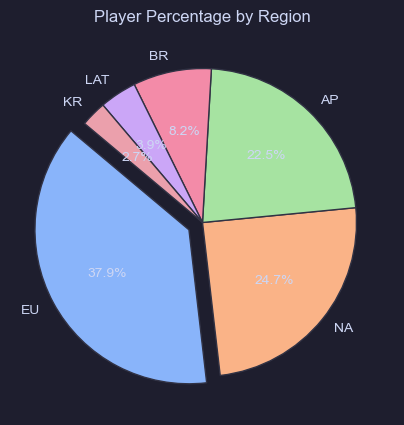

In [174]:
plt.figure(figsize=(5, 5)) 
plt.pie(region_count, labels=region_count.index, autopct='%1.1f%%', startangle=140, explode=(0.1, 0, 0, 0, 0, 0))
plt.title('Player Percentage by Region') 

plt.show()

Diving deeper in the dataset, it could be inferred from the pie chart that majority of the players are from the European Union (EU) region which accounts for 37.9% of the total observations. It is followed by North America (NA), Asia Pacific (AP), Brazil (BR), Latin America (LAT), and lastly, South Korea.

### What is the distribution on player ratings?

The observations from the dataset are primarily from players with the rank of **Immortal** or **Radiant**. However, some players were demoted upon data collection. Hence, let's see the distribution of the player ratings.

In [175]:
ratings_count = val_df['rating'].value_counts()
others_count = ratings_count.sum() - (ratings_count['Immortal 3'] + ratings_count['Immortal 2'] + ratings_count['Immortal 1'] + ratings_count['Radiant'])
data = {
    'Category': ['Others', 'Immortal 3', 'Immortal 2', 'Immortal 1', 'Radiant'],
    'Count': [others_count, ratings_count.get('Immortal 3', 0),
              ratings_count.get('Immortal 2', 0), ratings_count.get('Immortal 1', 0),
              ratings_count.get('Radiant', 0)]
}
ratings_count = pd.DataFrame(data)
ratings_count

,Category,Count
0,Others,94
1,Immortal 3,10846
2,Immortal 2,20475
3,Immortal 1,50069
4,Radiant,2584


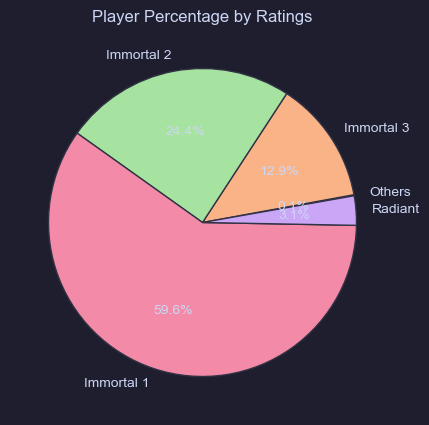

In [176]:
plt.figure(figsize=(5, 5))
plt.pie(ratings_count['Count'], labels=ratings_count['Category'], autopct='%1.1f%%', startangle=10)
plt.title('Player Percentage by Ratings')

plt.show()

As you can see in the data count and pie chart, only 0.1% of the observations account for demoted players. The majority are still in the rank of **Immortal** or **Radiant**.

### Who is the most played agent?

An **agent** refers to playable characters with distinct sets of abilities and play-style. Moreover, understanding the distribution of the top skilled players' most played agent helps us identify those who dominate the highest level of competition.

In [177]:
agent_count_df = val_df['agent_1'].value_counts()
agent_count_df

agent_1
Chamber      19168
Jett         11729
Reyna        10992
Raze          5907
Omen          5809
Sova          5715
Fade          5309
Sage          5051
Viper         3496
Brimstone     3356
KAY/O         1920
Skye          1742
Neon          1063
Killjoy        615
Breach         586
Yoru           566
Cypher         459
Astra          451
Phoenix        134
Name: count, dtype: int64

Text(0.5, 1.0, 'Player count per agent')

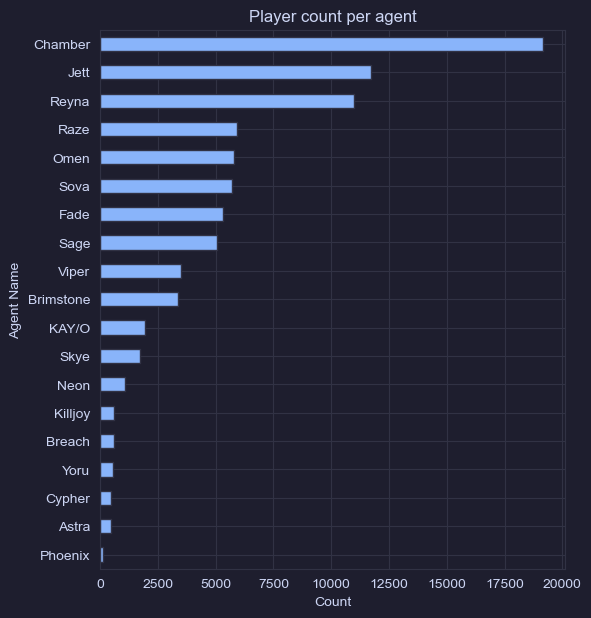

In [178]:
agent_count_df.plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Agent Name')
plt.title('Player count per agent')

As observed in the bar plot, **Chamber** fits the criteria with 19,168 players consider him as their most picked agent. On the other side of the graph, **Phoenix** is the least picked agent only accounting for 134 players.

### What is the most used agent type?

Let's further generalize our understanding on agent counts by determining the most used agent type.

In [179]:
agent_type_count = val_df['agent_1_type'].value_counts()
agent_type_count

agent_1_type
duelist       30391
sentinel      25293
initiator     15272
controller    13112
Name: count, dtype: int64

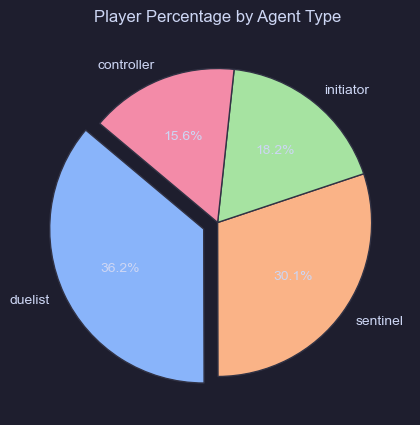

In [180]:
plt.figure(figsize=(5, 5))
plt.pie(agent_type_count, labels=agent_type_count.index, autopct='%1.1f%%', startangle=140, explode=(0.1, 0, 0, 0))
plt.title('Player Percentage by Agent Type')

plt.show()

As we can observe in the pie chart, **duelist** is the most used agent type, followed by **sentinel**, accounting for 36.2% and 30.1% usage, respectively.

### What is the most used gun?


A **gun** refers to a firearm and weapon available for players to use during matches. Furthermore, understanding the preferences of the top players help grasp the game's overall meta.

In [181]:
gun_count_df = val_df['gun1_name'].value_counts()
gun_count_df

gun1_name
Vandal      72452
Phantom     10930
Operator      407
Judge          85
Odin           62
Spectre        45
Sheriff        24
Guardian       18
Ghost          16
Classic         8
Frenzy          7
Marshal         3
Shorty          3
Bulldog         3
Ares            3
Bucky           2
Name: count, dtype: int64

Text(0.5, 1.0, 'Player count per gun')

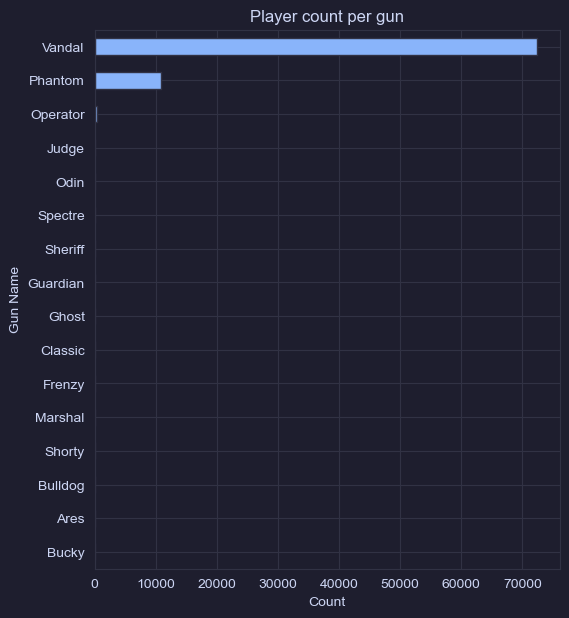

In [182]:
gun_count_df.plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Gun Name')
plt.title('Player count per gun')

It could be observed that the **Vandal** is the most used gun with 72,452 players having it as their top choice. It is followed by the **Phantom** with a 10,930 player count. However, these two guns greatly skewed the bar plot, which limits us in seeing the order for the least popular guns.

Text(0.5, 1.0, 'Gun count per player')

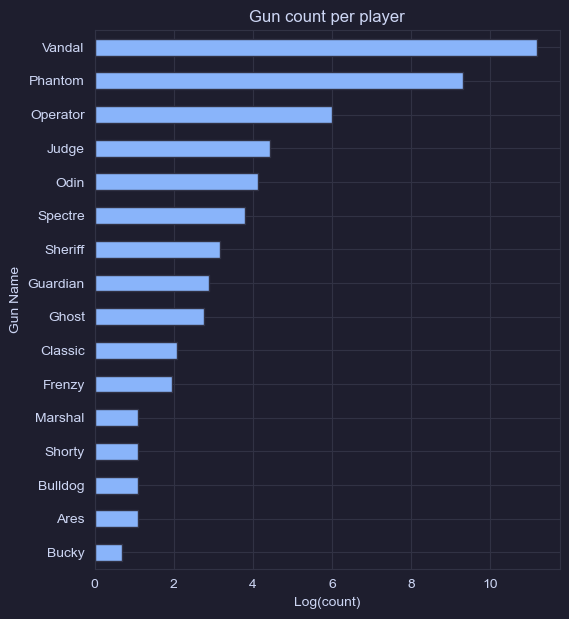

In [183]:
log_gun_count = np.log(gun_count_df)
log_gun_count.plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Log(count)')
plt.ylabel('Gun Name')
plt.title('Gun count per player')

We applied log transformation to reduce the effect of extremely high values while preserving the order. With this, the bar plot now shows the order of popularity for other guns.

### What is the average damage per round?

Computing for the **average damage per round** of a top-ranked player contributes to contextualizing their skill level.

In [184]:
agg = val_df.agg({"damage_round": ["mean", "median", "std"]})

In [185]:
mean = agg.loc["mean"][0]
median = agg.loc["median"][0]
mode = val_df['damage_round'].round(2).mode()
std = agg.loc["std"][0]

In [186]:
print('Mean: {:.2f}'.format(mean))
print('Median: {:.2f}'.format(median))
print('Mode: ', ', '.join(map(str, mode)))
print('Standard Deviation: {:.2f}'.format(std))

Mean: 142.83
Median: 142.00
Mode:  142.2, 143.8
Standard Deviation: 16.48


The measure of central tendency posits that they average about 142.83 damage per round with a 16.48 standard deviation. As all agents have a base health amount of 100 health points (increased by shields up to 50), this implies that they eliminate a full HP agent roughly once per round.

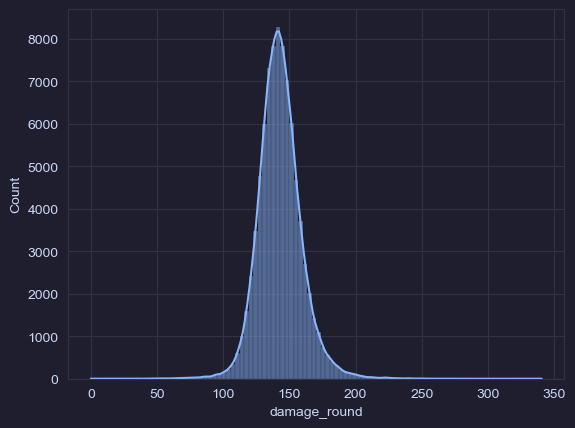

In [187]:
sns.histplot(val_df["damage_round"], bins=100, kde=True, edgecolor='black', linewidth=0.1)
plt.show()

We could observe a symmetrical distribution of **average damage per round** since the mean, median, and mode are relatively equal, and the histogram exhibits general balance.

### What is the average headshot percentage?

**Headshot percentage** is a key statistic in Valorant, for it generally reflects a player's accuracy and aiming skill. Therefore, it is a suitable variable to explore in understanding the observations.

In [188]:
agg = val_df.agg({"headshot_percent": ["mean", "median", "std"]})

In [189]:
mean = agg.loc["mean"][0]
median = agg.loc["median"][0]
std = agg.loc["std"][0]
mode = val_df['headshot_percent'].round(2).mode()

In [190]:
print('Mean: {:.2f}'.format(mean))
print('Median: {:.2f}'.format(median))
print('Mode:', ', '.join(map(str, mode)))
print('Standard Deviation: {:.2f}'.format(std))

Mean: 23.60
Median: 23.30
Mode: 22.4, 22.6
Standard Deviation: 5.19


The measure of central tendency posits that highly ranked players average about 23.60% **headshot percentage** with a 5.19% standard deviation.

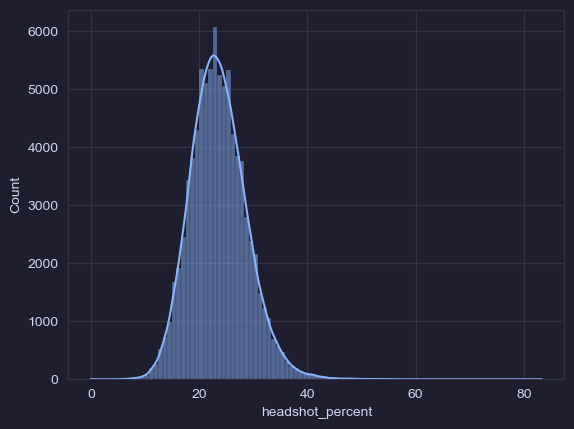

In [191]:
sns.histplot(val_df["headshot_percent"], bins=100, kde=True, edgecolor='black', linewidth=0.1)
plt.show()

We could also observe a symmetrical distribution of **headshot percentage** since the mean, median, and mode are relatively equal, and the histogram exhibits general balance.

### What is the average win percentage?

**Win-percentage** indicates the total number of matches won relative to toal number of matches played.

In [192]:
agg = val_df.agg({"win_percent": ["mean", "median", "std"]})

In [193]:
mean = agg.loc["mean"][0]
median = agg.loc["median"][0]
std = agg.loc["std"][0]
mode = val_df['win_percent'].round(2).mode()

In [194]:
print('Mean: {:.2f}'.format(mean))
print('Median: {:.2f}'.format(median))
print('Mode:', ', '.join(map(str, mode)))
print('Standard Deviation: {:.2f}'.format(std))

Mean: 53.89
Median: 52.90
Mode: 50.0
Standard Deviation: 11.38


The measure of central tendency indicates that players with high rankings, on average, have a winning percentage of 53.89%, with standard deviation of 11.38%.

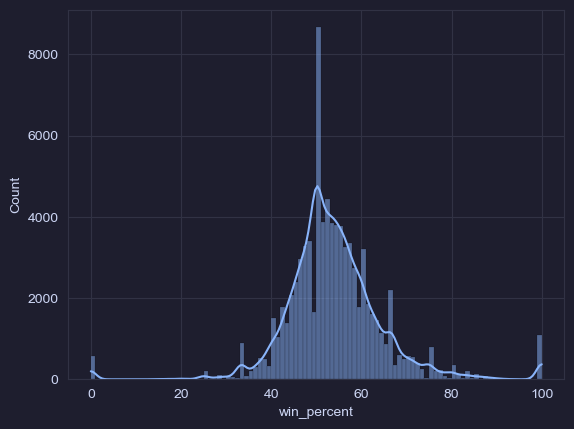

In [195]:
sns.histplot(val_df["win_percent"], bins=100, kde=True, edgecolor='black', linewidth=0.1)
plt.show()

The distribution is approximately symmetrical with slight positive skew indicated by the mean being a bit larger than median and mode. 

### What is the average kill-death ratio?

The **kill-death ratio** is a measure of a player's performance in terms of kills and deaths. It provides insights into a player’s ability to eliminate opponents relative to how often they are eliminated.


In [196]:
agg = val_df.agg({"kd_ratio": ["mean", "median", "std"]})

In [197]:
mean = agg.loc["mean"][0]
median = agg.loc["median"][0]
std = agg.loc["std"][0]
mode = val_df['kd_ratio'].round(2).mode()

In [198]:
print('Mean: {:.2f}'.format(mean))
print('Median: {:.2f}'.format(median))
print('Mode:', ', '.join(map(str, mode)))
print('Standard Deviation: {:.2f}'.format(std))

Mean: 1.05
Median: 1.04
Mode: 1.03
Standard Deviation: 0.16


The measure of central tendency posits that, on average, highly ranked players score 1.05 kills for every death, with a 0.16 standard deviation. 

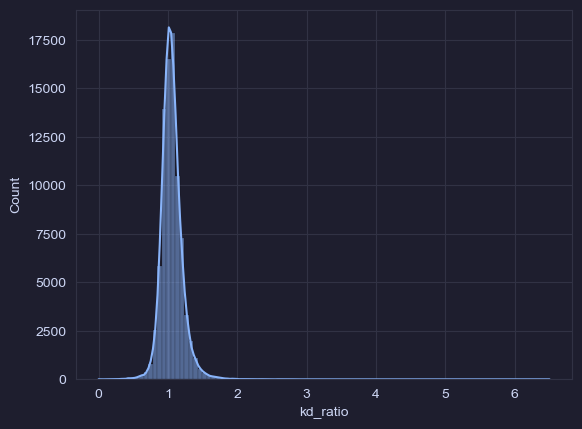

In [199]:
sns.histplot(val_df["kd_ratio"], bins=100, kde=True, edgecolor='black', linewidth=0.1)
plt.show()

We could also observe a symmetrical distribution of **kill-death ratio** since the mean, median, and mode are relatively equal, and the histogram exhibits general balance.

### What is the average number of assists?

**Assists** refer to the number of times the player has helped damage an opponent shortly before it is eliminated by a teammate. 

In [200]:
agg = val_df.agg({"assists": ["mean", "median", "std"]})

In [201]:
mean = agg.loc["mean"][0]
median = agg.loc["median"][0]
std = agg.loc["std"][0]
mode = val_df['assists'].round(2).mode()

In [202]:
print('Mean: {:.2f}'.format(mean))
print('Median: {:.2f}'.format(median))
print('Mode:', ', '.join(map(str, mode)))
print('Standard Deviation: {:.2f}'.format(std))

Mean: 232.61
Median: 187.00
Mode: 100
Standard Deviation: 189.85


The measure of central tendency implies that the mean of the distribution is 232.61 assists. However, the positive skewness of the data indicated by higher mean than median and mode, posits the usage of mode as a better way to gauge the center. Thus, it could be said that highly ranked players average on 187 assists.

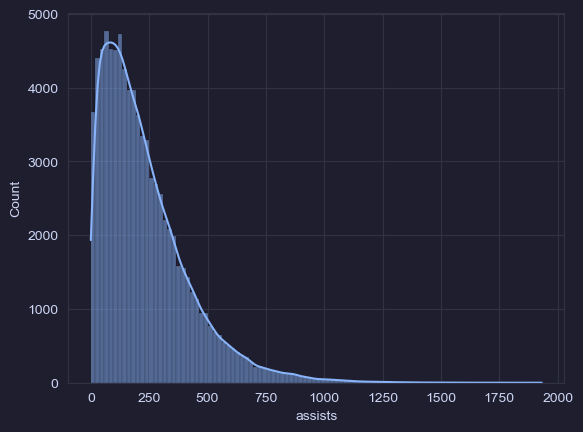

In [203]:
sns.histplot(val_df["assists"], bins=100, kde=True, edgecolor='black', linewidth=0.1)
plt.show()

The histogram shows a distribution that is positively skewed and has a notable presence of outliers on the higher end of the data set.

## Range of Different Variables

In [204]:
# Filter out the columns that are not numerical
variables = val_df.select_dtypes(include=['int', 'float']).columns.tolist()

for var in variables:
    range_var = val_df[var].max() - val_df[var].min()
    print(f"Range for {var}: {range_var}")

Range for damage_round: 340.6
Range for headshots: 5261
Range for headshot_percent: 83.3
Range for aces: 24
Range for clutches: 488
Range for flawless: 316
Range for first_bloods: 1296
Range for kills: 6016
Range for deaths: 5045
Range for assists: 1932
Range for kd_ratio: 6.5
Range for kills_round: 2.0
Range for most_kills: 58
Range for score_round: 550.5
Range for wins: 170
Range for win_percent: 100.0
Range for gun1_head: 100
Range for gun1_body: 100
Range for gun1_legs: 50
Range for gun1_kills: 3845
Range for gun2_head: 100
Range for gun2_body: 100
Range for gun2_legs: 100
Range for gun2_kills: 1279
Range for gun3_head: 100
Range for gun3_body: 100
Range for gun3_legs: 100
Range for gun3_kills: 650
Range for games_played: 325.0


## Presence of Outliers
Before I start with the analysis, I would like to define what an outlier is. An outlier is a data point that differs significantly from other observations. It is important to identify outliers because they can affect the results of the analysis.


### Are there Outliers in the Dataset?

Getting the summary statistics of the dataset. This will give us an idea of the distribution of the data and let us know if there are any potential outliers worth investigating.

In [205]:
summary = val_df.describe()
summary

,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,deaths,assists,...,gun1_kills,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_head,gun3_body,gun3_legs,gun3_kills,games_played
count,84068.000000,84068.000000,84068.000000,84068.000000,84068.000000,84068.000000,84068.000000,84068.000000,84068.000000,84068.000000,...,84068.000000,84068.000000,84068.000000,84068.000000,84068.000000,84068.000000,84068.000000,84068.000000,84068.000000,83483.000000
mean,142.826096,457.681044,23.601826,1.057477,66.225984,39.050328,100.533425,721.844899,689.873579,232.612219,...,345.375910,30.465540,64.981194,4.513953,116.536268,30.645894,64.854368,4.310915,59.312890,45.255833
std,16.480507,371.632193,5.190945,1.491919,53.050587,31.037088,90.974466,573.736230,547.917946,189.854636,...,287.725503,12.511904,12.272346,3.289087,110.669568,15.912406,15.431870,4.083850,51.197876,35.138852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,132.800000,184.750000,20.000000,0.000000,27.000000,16.000000,36.000000,296.000000,283.000000,93.000000,...,137.000000,24.000000,59.000000,2.000000,40.000000,20.000000,57.000000,1.000000,23.000000,19.000000
50%,142.000000,366.000000,23.300000,1.000000,54.000000,32.000000,75.000000,587.000000,561.000000,187.000000,...,272.000000,30.000000,65.000000,4.000000,84.000000,28.000000,67.000000,4.000000,46.000000,37.000000
75%,151.800000,630.000000,26.800000,2.000000,92.000000,55.000000,137.000000,999.000000,955.000000,322.000000,...,472.000000,37.000000,71.000000,6.000000,158.000000,40.000000,73.000000,6.000000,81.000000,63.000000
max,340.600000,5261.000000,83.300000,24.000000,488.000000,316.000000,1296.000000,6016.000000,5048.000000,1932.000000,...,3845.000000,100.000000,100.000000,100.000000,1279.000000,100.000000,100.000000,100.000000,650.000000,326.000000


The summary statistics provide valuable insights, especially for identifying potential outliers in the dataset. Notably, some variables show significant differences between their 75th percentile (Q3) and the maximum value, indicating the possibility of outliers. For instance, attributes like `headshots`, `clutches`, and `flawless` display marked disparities between Q3 and the maximum. Moreover, variables such as `kills`, `deaths`, `assists`, `kd_ratio`, and `kills_round` exhibit substantial variability in their upper quartile and maximum values. This statistical variation suggests the presence of potential outliers in these attributes, prompting the need for further investigation to assess their impact on the dataset.


### Is the `damage_round` variable affected by outliers?

<Axes: xlabel='damage_round'>

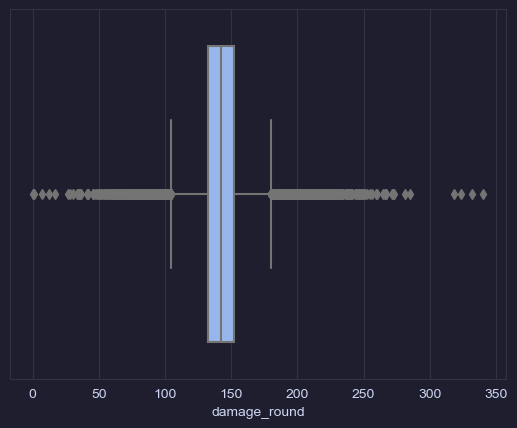

In [206]:
sns.boxplot(x=val_df['damage_round'])


The boxplot reveals numerous outliers in the damage_round variable, suggesting substantial variability in damage dealt per round. The median, positioned at approximately 140, indicates a central tendency in the data. Notably, the distribution appears positively skewed.

The outliers to the right of the boxplot represent players excelling with high damage output, showcasing their exceptional skill in the game. These data points are valid and reflective of outstanding performance.

Conversely, outliers on the far left, some registering a damage per round of 0, are deemed invalid. Such cases may indicate that these players were inactive during the data collection period.

As a result, these invalid data points will be removed from the dataset to enhance data quality.

Before we do so, let us first check the number of rows before removing the outliers.

In [207]:
val_df.shape

(84068, 40)

We will be applying a filter to remove the outliers. The filter will remove the rows where the `damage_round` is equal to 0 and the `gun1_kills` is equal to 0.

The reason for doing so is that the parameters is indicative of a player with no activity during the data collection period. As such, these data points are deemed invalid and will be removed from the dataset.

<Axes: xlabel='damage_round'>

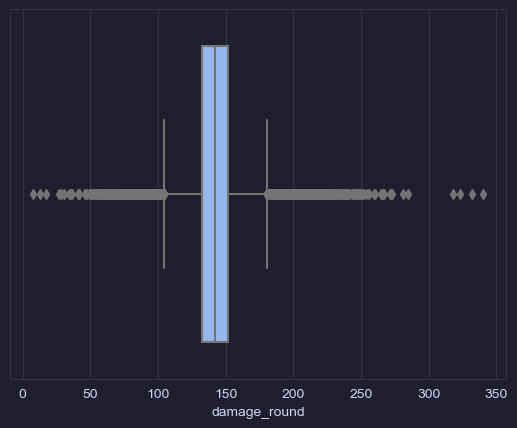

In [208]:
val_df = val_df[(val_df['damage_round'] > 0) & (val_df['gun1_kills'] > 0)]

sns.boxplot(x=val_df['damage_round'])

After removing the outliers, let us check the number of rows again.

In [209]:
val_df.shape

(84065, 40)

### Is the `headshots` variable affected by outliers?

<Axes: xlabel='headshots'>

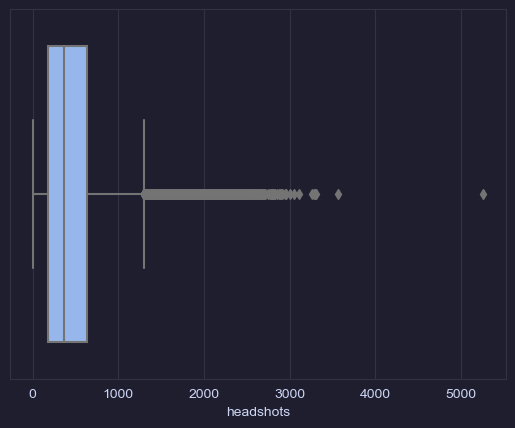

In [210]:
sns.boxplot(x=val_df['headshots'])

The box plot for the `headshots` variable reveals an abundance of outliers, marked by data points beyond the boxplot's range. It also highlights a median of approximately 30, indicating a central tendency. Additionally, the data exhibits a positive skew.

Notably, a distinct data point stands out as an outlier due to its substantial deviation from the rest of the data. However, this outlier is considered valid, as it signifies the potential for exceptional headshot performance in the game and reflects the exceptional skill of the player.


In [211]:
val_df[val_df['headshots'] > 5000]

,region,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played
65629,AP,Immortal 1,191.5,5261,38.8,19,439,289,1296,6016,...,466,Bulldog,43,54,3,434,duelist,duelist,initiator,281.0


Furthermore, upon closer examination of the dataset, it is apparent that instances where the variable 'headshots' equals zero should not be dismissed as outliers. This is justified by the fact that obtaining zero headshots during gameplay is a plausible outcome, indicative of players who may not have extensive playtime during the time frame of when the data was collected.

In [212]:
val_df[val_df['headshots'] == 0]

,region,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played
43717,EU,Immortal 1,30.5,0,15.4,0,0,1,0,1,...,0,Classic,0,0,0,0,duelist,None,None,NaN
44248,EU,Immortal 1,34.0,0,0.0,0,0,0,1,2,...,1,Ghost,0,0,0,0,duelist,None,None,NaN
52205,EU,Immortal 1,40.9,0,0.0,0,1,0,1,4,...,1,Ghost,0,0,0,0,sentinel,None,None,NaN


### Is the `headshot_percent` variable affected by outliers?


<Axes: xlabel='headshot_percent'>

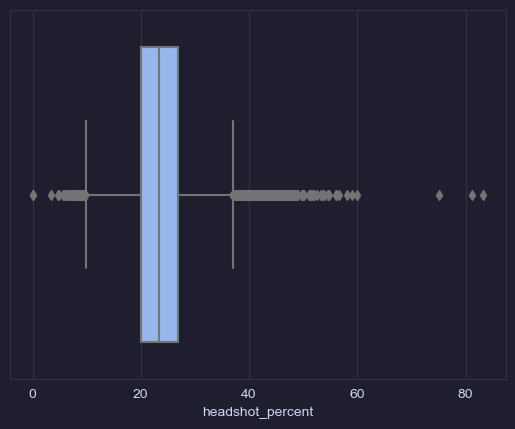

In [213]:
sns.boxplot(x=val_df['headshot_percent'])

Upon examination, we've focused on data points with `headshot_percent` exceeding 70. It's important to note that these data points remain valid, as achieving a headshot percentage above 70 is within the realm of possibility and signifies the exceptional proficiency of these players in the game.


In [214]:
val_df[val_df['headshot_percent'] > 70]

,region,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played
3582,NA,Immortal 1,28.2,2,75.0,0,0,0,0,2,...,1,Sheriff,0,0,0,0,duelist,None,None,NaN
7977,NA,Immortal 1,174.6,19,83.3,0,1,3,0,19,...,3,Phantom,100,0,0,2,controller,None,None,1.0
71849,KR,Immortal 1,111.2,108,81.2,0,13,4,5,113,...,15,Ghost,90,10,0,14,initiator,controller,duelist,8.0


Upon closer examination, we find data points with a `headshot_percent` of 0. These data points remain valid, as a 0% headshot percentage is within the realm of possibility in the game. Furthermore, it suggests that these players were inactive during the data collection period.


In [215]:
val_df[val_df['headshot_percent'] == 0]

,region,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played
44248,EU,Immortal 1,34.0,0,0.0,0,0,0,1,2,...,1,Ghost,0,0,0,0,duelist,None,None,NaN
52205,EU,Immortal 1,40.9,0,0.0,0,1,0,1,4,...,1,Ghost,0,0,0,0,sentinel,None,None,NaN


### Is the `aces` variable affected by outliers?

In [216]:
summary['aces']

count    84068.000000
mean         1.057477
std          1.491919
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         24.000000
Name: aces, dtype: float64

<Axes: xlabel='aces'>

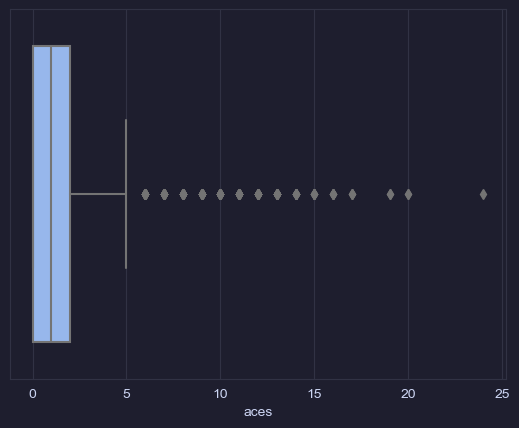

In [217]:
sns.boxplot(x=val_df['aces'])

Examining the quartiles, we find that 25% of the data points record zero aces, while the median (50th percentile) is 1. This signifies that the majority of players commonly achieve one ace per act. Moving to the 75th percentile, we observe that 50% of players attain two aces or fewer, underlining the infrequency of a high-ace act.

Finally, the maximum value of 24 signifies an outlier among the data, indicating rare instances of exceptional performance, possibly from a small subset of players who achieved an unusually high number of aces in a single act. 

Exploring data points with `aces` exceeding 10, it's worth noting that these data points remain valid. The game allows for the possibility of achieving more than 10 aces, and thus, these players demonstrate exceptional prowess in their gameplay.


In [218]:
val_df[val_df['aces'] > 10]

,region,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played
35,NA,Immortal 3,158.2,1906,35.2,11,219,111,511,2407,...,353,Sheriff,69,30,1,174,duelist,controller,sentinel,138.0
1582,NA,Immortal 1,152.0,2136,29.1,12,307,147,656,2965,...,190,Spectre,23,73,4,170,duelist,sentinel,initiator,183.0
4249,NA,Immortal 1,162.5,1597,27.6,11,168,108,316,2205,...,350,Ghost,37,62,1,134,duelist,sentinel,duelist,120.0
4344,NA,Immortal 1,163.1,2402,23.1,15,289,189,824,3515,...,1038,Spectre,23,71,6,505,duelist,duelist,sentinel,197.0
6475,NA,Immortal 1,163.4,2999,36.8,12,281,211,589,3692,...,366,Sheriff,69,30,1,207,duelist,initiator,initiator,198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80603,BR,Radiant,159.1,2914,32.5,16,326,139,819,3711,...,692,Spectre,35,62,3,198,duelist,sentinel,duelist,199.0
80845,LAT,Radiant,194.4,2959,40.3,16,215,153,587,3469,...,1038,Sheriff,77,22,1,491,duelist,sentinel,duelist,157.0
83656,LAT,Radiant,179.7,2347,23.9,16,281,195,709,3514,...,533,Spectre,24,70,6,322,duelist,duelist,duelist,171.0
83677,LAT,Radiant,188.5,2215,43.1,15,212,121,539,2563,...,310,Sheriff,50,50,1,74,duelist,duelist,sentinel,117.0


Upon scrutinizing the dataset, it becomes evident that data points with `aces` greater than 10 are indeed valid, as achieving more than 10 aces is within the realm of possibility and indicative of highly skilled players.

Conversely, cases where 'aces' equals zero should not be hastily regarded as outliers. Zero aces are a plausible outcome, reflecting players with limited gameplay during the data collection period.



### Is the `clutches` variable affected by outliers?

count    84068.000000
mean        66.225984
std         53.050587
min          0.000000
25%         27.000000
50%         54.000000
75%         92.000000
max        488.000000
Name: clutches, dtype: float64

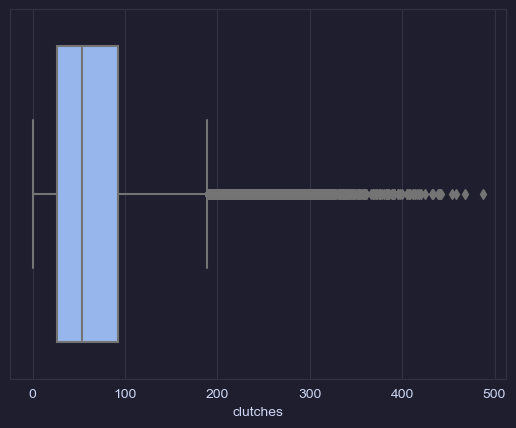

In [219]:
sns.boxplot(x=val_df['clutches'])
summary['clutches']

Exploring data points with `clutches` exceeding 200, we observe an interesting trend. Despite the median clutch count for players being around 54 per act, these high-clutch data points are considered valid. It's possible to achieve more than 200 clutches, as indicated by the boxplot's maximum value. These players demonstrate exceptional skill in the game, outperforming the norm.


In [220]:
val_df[val_df['clutches'] > 200]

,region,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played
19,NA,Radiant,130.1,1702,19.7,3,294,205,458,2902,...,492,Spectre,24,68,7,212,sentinel,duelist,duelist,200.0
21,NA,Radiant,142.3,1830,21.6,3,275,157,452,3195,...,504,Operator,7,92,1,220,duelist,sentinel,initiator,189.0
35,NA,Immortal 3,158.2,1906,35.2,11,219,111,511,2407,...,353,Sheriff,69,30,1,174,duelist,controller,sentinel,138.0
45,NA,Immortal 3,141.3,1361,21.6,3,208,123,287,2174,...,305,Spectre,19,74,7,172,duelist,initiator,controller,144.0
52,NA,Immortal 3,127.6,1163,19.8,1,234,113,313,1959,...,542,Spectre,22,71,7,192,duelist,sentinel,initiator,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83991,LAT,Radiant,145.7,1064,17.1,5,211,121,379,2144,...,262,Operator,11,88,1,173,duelist,controller,controller,134.0
84021,LAT,Radiant,167.9,2385,26.6,12,326,194,826,3749,...,831,Operator,11,89,0,554,duelist,sentinel,duelist,196.0
84027,LAT,Radiant,162.2,1829,19.4,9,277,150,550,3152,...,488,Operator,9,90,1,301,duelist,duelist,duelist,174.0
84046,LAT,Radiant,158.6,1441,24.1,5,205,105,397,2195,...,178,Ghost,40,57,3,108,duelist,sentinel,duelist,122.0


### Is the `flawless` variable affected by outliers?

count    84068.000000
mean        39.050328
std         31.037088
min          0.000000
25%         16.000000
50%         32.000000
75%         55.000000
max        316.000000
Name: flawless, dtype: float64

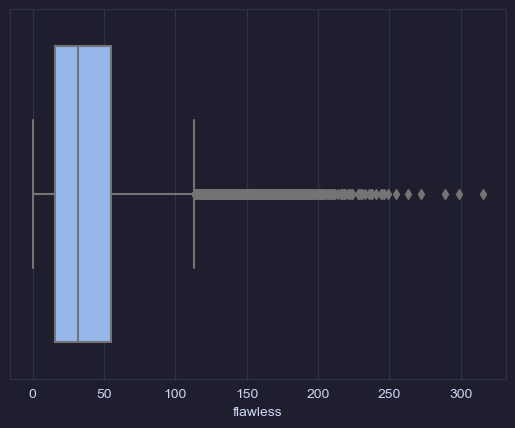

In [221]:
sns.boxplot(x=val_df['flawless'])
summary['flawless']

We're exploring data points where `flawless` exceeds 100. These data points remain valid, as surpassing 100 flawless rounds is attainable. These players demonstrate exceptional prowess in the game.



### Is the `first_bloods` variable affected by outliers?

count    84068.000000
mean       100.533425
std         90.974466
min          0.000000
25%         36.000000
50%         75.000000
75%        137.000000
max       1296.000000
Name: first_bloods, dtype: float64


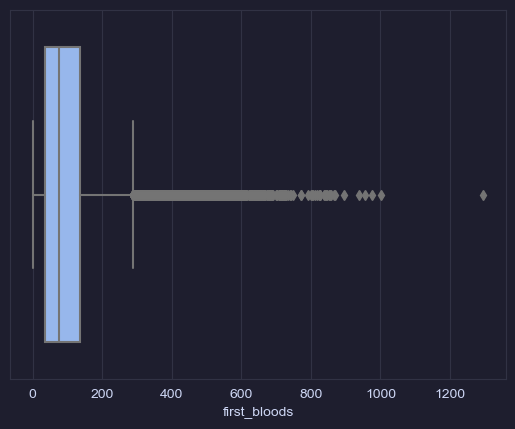

In [222]:
sns.boxplot(x=val_df['first_bloods'])
print(summary['first_bloods'])

Upon investigation, we find data points in the `first_bloods` variable where values exceed 250. Notably, the dataset's descriptive statistics reveal that the maximum `first_bloods` value is 1296, well beyond this threshold. However, such high values are entirely valid since it is possible to achieve more than 10 first bloods in a game. These exceptional figures underscore the extraordinary skill levels of the corresponding players.


### Is the `kills` variable affected by outliers?

count    84065.000000
mean       721.870660
std        573.730261
min          1.000000
25%        296.000000
50%        587.000000
75%        999.000000
max       6016.000000
Name: kills, dtype: float64


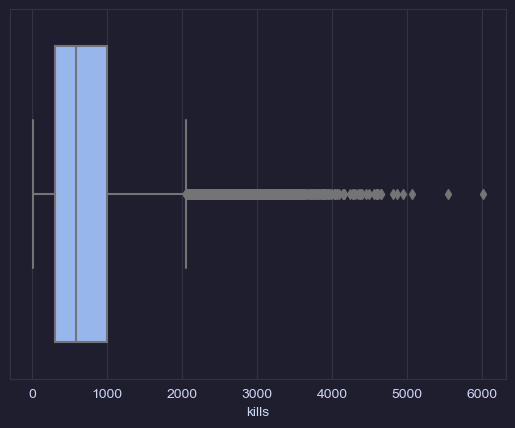

In [223]:
sns.boxplot(x=val_df['kills'])
print(val_df['kills'].describe())


Upon closer inspection of the `kills` data, it becomes apparent that certain data points lie beyond the 4th quartile (greater than 999) or hover around 0. Remarkably, these data points retain their validity, as the game accommodates both remarkably high kill counts, surpassing 2000, and near-zero kills (0). These extremes may signify exceptional player prowess or periods of inactivity within the data collection period.


### Is the `deaths` variable affected by outliers?

count    84065.000000
mean       689.897746
std        547.912786
min          3.000000
25%        283.000000
50%        561.000000
75%        955.000000
max       5048.000000
Name: deaths, dtype: float64

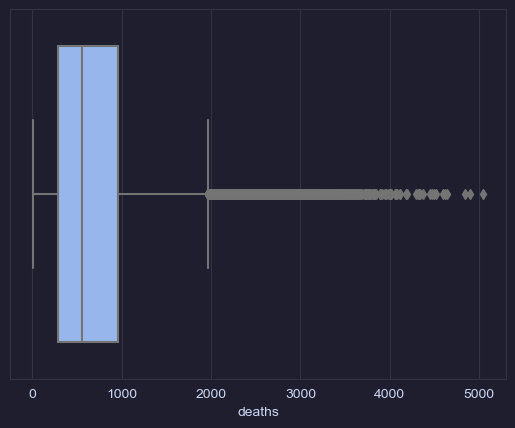

In [224]:
sns.boxplot(x=val_df['deaths'])
val_df['deaths'].describe()

Upon inspection, we focus on data points where `deaths` exceed the 4th quartile or equal 0. It's worth noting that these data points remain valid as they encompass both exceptional players with a high number of deaths (potentially exceeding 2000) and those with minimal deaths (near 0). Such variations may be attributed to superior gameplay skills or periods of inactivity during the data collection timeframe.


### Is the `assists` variable affected by outliers?

<Axes: xlabel='assists'>

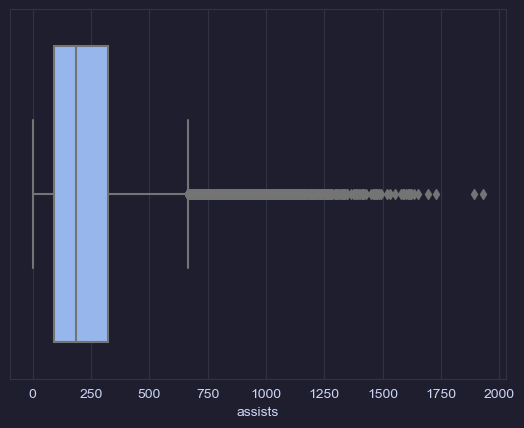

In [225]:
sns.boxplot(x=val_df['assists'])

In [226]:
val_df['assists'].describe()
val_df[val_df['assists'] == 0]

,region,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played
2523,NA,Immortal 1,116.0,10,25.6,0,1,2,6,16,...,5,Vandal,100,0,0,1,duelist,None,None,NaN
3110,NA,Immortal 1,74.6,4,20.0,0,2,0,0,5,...,0,Classic,0,0,0,0,sentinel,None,None,NaN
3590,NA,Immortal 1,120.2,10,24.5,0,0,0,3,11,...,2,Vandal,50,50,0,1,duelist,None,None,NaN
3621,NA,Immortal 1,57.9,2,18.2,0,2,1,1,5,...,0,Vandal,0,0,0,0,sentinel,None,None,NaN
6254,NA,Immortal 1,163.1,12,26.2,0,4,1,3,22,...,7,Spectre,18,73,9,3,duelist,None,None,1.0
7216,NA,Immortal 1,144.7,15,47.2,0,5,0,0,17,...,3,Phantom,0,0,0,0,duelist,None,None,1.0
10431,NA,Immortal 1,228.2,27,40.9,0,1,0,2,31,...,5,Ghost,75,25,0,3,duelist,None,None,1.0
41923,EU,Immortal 1,240.1,30,54.5,0,2,2,5,33,...,0,Sheriff,0,0,0,0,sentinel,None,None,1.0
42255,EU,Immortal 1,144.1,14,51.2,0,2,1,1,18,...,2,Ghost,100,0,0,1,sentinel,None,None,NaN
43363,EU,Immortal 1,67.5,2,11.8,0,1,0,1,6,...,1,Classic,0,0,0,0,sentinel,None,None,NaN


When examining data points where `assists` surpass the 4th quartile or equal zero, it is important to note their statistical validity. Data points with exceptionally high assists, exceeding the 4th quartile, remain valid, as it is statistically possible to achieve such high values, indicating outstanding in-game support or teamwork. Likewise, cases with 0 assists are also valid, potentially signifying periods of inactivity during data collection but still inhibit valid playtime to be considered. These observations emphasize the diverse skill levels and activity levels of players within the dataset.


### Is the `kd_ratio` variable affected by outliers?

count    84065.000000
mean         1.054265
std          0.157470
min          0.080000
25%          0.960000
50%          1.040000
75%          1.130000
max          6.500000
Name: kd_ratio, dtype: float64


<Axes: xlabel='kd_ratio'>

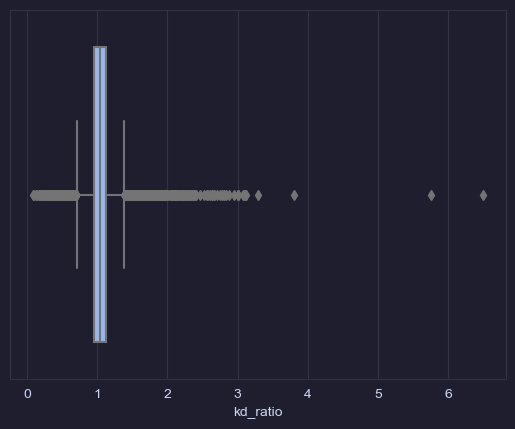

In [227]:
print(val_df['kd_ratio'].describe())

sns.boxplot(x=val_df['kd_ratio'])


Exploring data points where the `kd_ratio` exceeds the 4th quartile or approaches zero reveals intriguing insights. These observations remain valid within the dataset, as they signify scenarios where players have either more deaths than kills or vice versa. This variance is a statistical reflection of exceptional skill in the game or periods of inactivity during the data collection timeframe.


Upon closer examination of values close to zero in the `kd_ratio`, it becomes evident that such values are not indicative of erroneous data but rather a valid representation of a player's skill level. A `kd_ratio` of 0 is entirely feasible, indicating that a player has incurred more deaths than kills. This can result from a player's inactivity during the data collection period or a player's limited proficiency in the game.


In [228]:
val_df[(val_df['kd_ratio'] > 0) & (val_df['kd_ratio'] < 1)]

,region,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played
19,NA,Radiant,130.1,1702,19.7,3,294,205,458,2902,...,492,Spectre,24,68,7,212,sentinel,duelist,duelist,200.0
20,NA,Radiant,143.7,953,28.5,4,123,64,232,1290,...,367,Sheriff,49,50,1,101,duelist,duelist,initiator,79.0
25,NA,Radiant,127.7,690,19.1,0,126,72,154,1182,...,142,Spectre,23,70,6,123,initiator,sentinel,initiator,84.0
27,NA,Immortal 3,148.3,1136,28.2,2,138,75,330,1590,...,308,Operator,9,91,0,94,duelist,duelist,sentinel,93.0
29,NA,Radiant,120.7,899,19.9,2,153,75,132,1518,...,352,Spectre,23,69,8,168,initiator,controller,initiator,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83999,LAT,Radiant,123.0,568,17.1,3,104,56,119,992,...,86,Classic,28,63,9,65,controller,initiator,sentinel,74.0
84005,LAT,Radiant,140.6,1086,20.2,0,191,91,221,1795,...,364,Spectre,29,65,6,125,duelist,initiator,sentinel,118.0
84006,LAT,Radiant,134.7,646,22.6,2,115,42,134,1019,...,88,Classic,36,61,3,74,initiator,sentinel,controller,69.0
84041,LAT,Radiant,130.4,495,16.3,0,107,61,120,971,...,103,Phantom,25,69,6,80,sentinel,duelist,duelist,71.0


### Is the `kills_round` variable affected by outliers?

count    84065.000000
mean         0.758181
std          0.098093
min          0.000000
25%          0.700000
50%          0.800000
75%          0.800000
max          2.000000
Name: kills_round, dtype: float64


<Axes: xlabel='kills_round'>

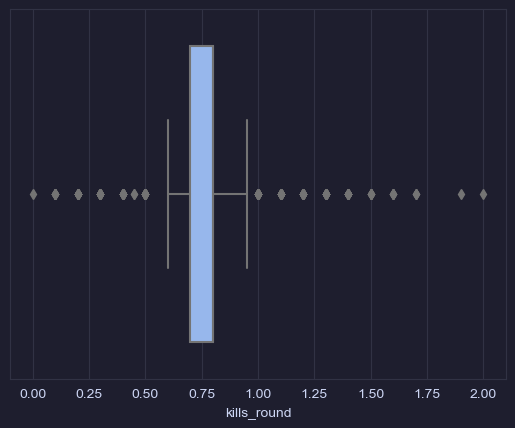

In [229]:
print(val_df['kills_round'].describe())

sns.boxplot(x=val_df['kills_round'])

The presence of outliers is evident in the maximum value of 2, which is substantially greater than the interquartile range (IQR) and the upper quartile (Q3). These outliers could represent rounds where a few players achieved an unusually high number of kills, potentially due to exceptional performance or specific game circumstances. It's important to note that while these data points are outliers, they are still valid and not indicative of erroneous data; they signify extraordinary performance by some players in certain rounds. Further analysis may be required to understand the factors contributing to these high values and their impact on the overall dataset.

### Is the `kills_game` variable affected by outliers?

count    84065.000000
mean        28.157997
std          5.218749
min          1.000000
25%         25.000000
50%         28.000000
75%         31.000000
max         58.000000
Name: most_kills, dtype: float64


<Axes: xlabel='most_kills'>

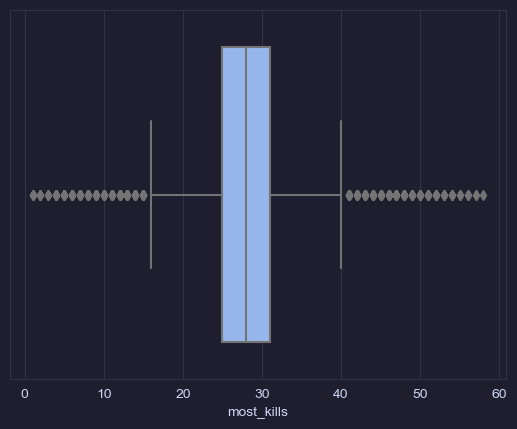

In [230]:
print(val_df['most_kills'].describe())
sns.boxplot(x=val_df['most_kills'])

In [231]:
val_df[val_df['most_kills'] < 3]

,region,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played
2141,NA,Immortal 1,7.3,1,20.0,0,2,1,0,1,...,0,Frenzy,0,0,0,0,controller,None,None,NaN
2429,NA,Immortal 1,27.0,1,11.1,0,0,1,0,2,...,0,Vandal,0,0,0,0,sentinel,None,None,NaN
3387,NA,Immortal 1,41.8,2,45.5,0,2,0,0,2,...,1,Ghost,0,0,0,0,initiator,None,None,NaN
3582,NA,Immortal 1,28.2,2,75.0,0,0,0,0,2,...,1,Sheriff,0,0,0,0,duelist,None,None,NaN
23752,EU,Immortal 1,35.4,1,20.0,0,0,0,0,2,...,0,Frenzy,0,0,0,0,sentinel,None,None,NaN
43717,EU,Immortal 1,30.5,0,15.4,0,0,1,0,1,...,0,Classic,0,0,0,0,duelist,None,None,NaN
44140,EU,Immortal 1,35.8,1,16.7,0,0,0,0,1,...,0,Classic,0,0,0,0,controller,None,None,NaN
44248,EU,Immortal 1,34.0,0,0.0,0,0,0,1,2,...,1,Ghost,0,0,0,0,duelist,None,None,NaN
44400,EU,Immortal 1,36.8,1,6.7,0,0,1,0,2,...,1,Ghost,0,0,0,0,controller,None,None,NaN
63484,AP,Immortal 1,12.6,1,50.0,0,1,0,0,1,...,0,Classic,0,0,0,0,initiator,None,None,NaN


Regarding the outliers in the most_kills variable, it's important to note that outliers exceeding the upper bound (Q3 + 1.5 * IQR) are still considered valid data points. These outliers may represent exceptionally skilled players who achieved a higher number of kills, as indicated by the maximum value of 58. While they deviate from the majority of the data, they are not erroneous or invalid but rather reflective of extraordinary performance in the game.

### Is the `score_round` variable affected by outliers?

count    84065.000000
mean       218.249487
std         26.323474
min         12.400000
25%        202.100000
50%        216.700000
75%        232.600000
max        550.500000
Name: score_round, dtype: float64


<Axes: xlabel='score_round'>

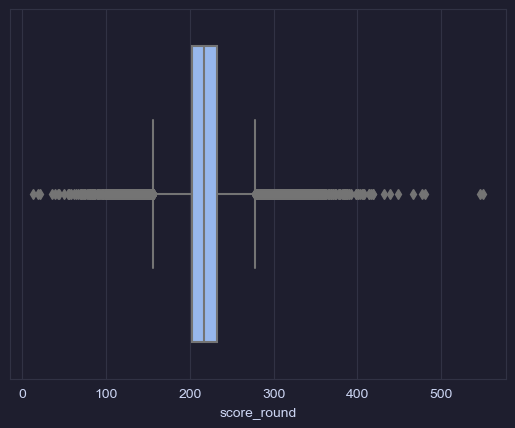

In [232]:
print(val_df['score_round'].describe())
sns.boxplot(x=val_df['score_round'])

In [233]:
val_df[val_df['score_round'] > 500]

,region,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played
8104,NA,Immortal 1,332.2,14,26.8,1,0,2,3,26,...,4,Classic,63,38,0,3,initiator,None,None,1.0
67513,AP,Immortal 1,340.6,44,36.3,3,4,1,12,56,...,9,Ghost,0,0,0,0,duelist,None,None,1.0


The presence of outliers is evident from the notably higher maximum value, 550.5, which significantly exceeds the upper quartile (Q3) value. These outliers, despite being data points that fall outside the typical range, remain valid, as they indicate exceptional performance in the game, with scores far surpassing the majority of players. While outliers, they provide valuable insights into extraordinary player achievements within the dataset.

### Is the `wins` variable affected by outliers?

count    84065.000000
mean        23.749384
std         18.344364
min          0.000000
25%         10.000000
50%         20.000000
75%         33.000000
max        170.000000
Name: wins, dtype: float64


<Axes: xlabel='wins'>

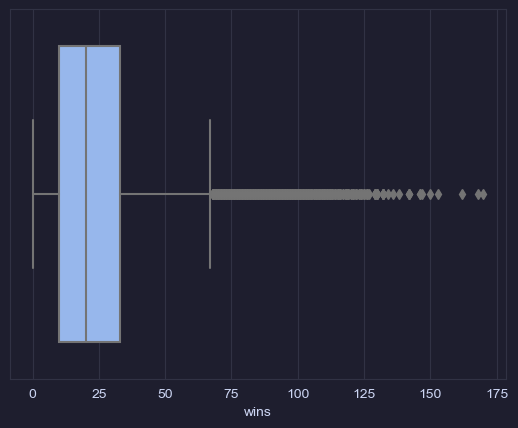

In [234]:
print(val_df['wins'].describe())
sns.boxplot(x=val_df['wins'])

In [235]:
val_df[val_df['wins'] > 155]

,region,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played
12843,NA,Immortal 1,155.2,2847,17.8,20,458,241,845,5548,...,938,Operator,6,93,1,463,duelist,sentinel,duelist,319.0
65629,AP,Immortal 1,191.5,5261,38.8,19,439,289,1296,6016,...,466,Bulldog,43,54,3,434,duelist,duelist,initiator,281.0
80171,BR,Immortal 3,139.1,2715,22.6,5,454,272,748,4816,...,596,Operator,11,88,1,381,sentinel,initiator,duelist,300.0


Regarding the outliers, based on the statistics provided, it's evident that there are likely some outliers with wins significantly exceeding the 75th percentile value of 33. While these outliers may appear atypical, they are still considered valid data points. Players achieving a high number of wins are indeed exceptional and can be indicative of great skill or extensive gameplay. Therefore, the outliers, even though they deviate from the typical range of wins, are valid and should not be removed from the dataset.

### Is the `win_percent` variable affected by outliers?

count    84065.000000
mean        53.891653
std         11.374570
min          0.000000
25%         48.100000
50%         52.900000
75%         58.800000
max        100.000000
Name: win_percent, dtype: float64


<Axes: xlabel='win_percent'>

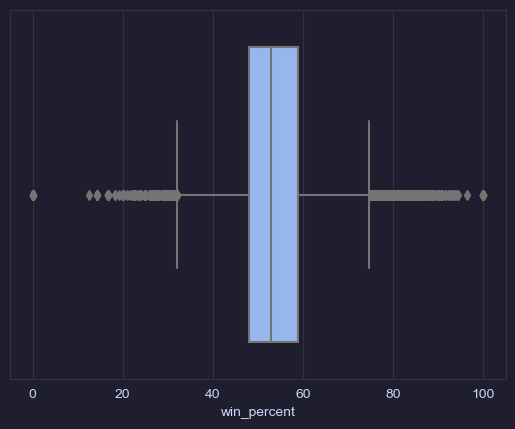

In [236]:
print(val_df['win_percent'].describe())
sns.boxplot(x=val_df['win_percent'])

Now, regarding the outliers in this context, it's important to note that, while the data may have extreme values beyond the interquartile range (IQR) boundaries (Q1 - 1.5 * IQR and Q3 + 1.5 * IQR), they are still valid data points. Outliers can signify exceptional performance in this case, where some players might have remarkably high win percentages or possibly extremely low ones. These outliers should not be dismissed as erroneous data but may reflect the diversity of player performance in the dataset.

We can see that there are data points that are equal to `0`, let's investigate these instances.

In [237]:
val_df[val_df['win_percent'] == 0]

,region,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played
2095,NA,Immortal 1,88.4,6,13.0,0,1,1,1,8,...,2,Ghost,0,0,0,0,controller,None,None,NaN
2102,NA,Immortal 1,250.5,30,39.8,1,0,1,2,35,...,9,Ghost,29,71,0,3,duelist,None,None,NaN
2124,NA,Immortal 1,189.0,18,27.3,1,2,1,9,29,...,7,Ghost,50,50,0,2,duelist,None,None,NaN
2130,NA,Immortal 1,129.3,12,37.1,0,0,1,2,14,...,3,Operator,0,100,0,1,controller,None,None,NaN
2136,NA,Immortal 1,71.1,6,31.8,0,1,0,1,7,...,1,Spectre,33,67,0,1,controller,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75088,BR,Immortal 1,148.8,12,43.3,0,1,1,0,14,...,2,Ghost,50,50,0,1,duelist,None,None,NaN
75103,BR,Immortal 1,112.0,18,22.9,0,3,2,4,26,...,4,Classic,75,25,0,2,duelist,controller,duelist,NaN
75122,BR,Immortal 1,150.7,25,33.0,0,5,5,5,38,...,4,Bulldog,50,50,0,3,initiator,initiator,None,NaN
75456,BR,Immortal 1,114.5,19,30.6,0,3,4,4,29,...,3,Ghost,50,50,0,2,duelist,initiator,None,NaN


Statistically, our analysis indicates that these players have participated in a limited number of games, and they have not secured any victories. It's important to note that these data points are valid and should be retained in the dataset. The presence of such data provides valuable insights, including the performance of novice or less successful players, which can contribute to a more comprehensive understanding of the game's player base.


## Comparing Two Variables

### Constructing a correlation matrix
By constructing a correlation matrix, we can see the relationship between pairs of variables.

In [238]:
# Create a correlation matrix on numerical columns. Filter out the columns that are not numerical.
corr_matrix = val_df.select_dtypes(include=['int', 'float']).corr()
corr_matrix

,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,deaths,assists,...,gun1_kills,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_head,gun3_body,gun3_legs,gun3_kills,games_played
damage_round,1.000000,0.117828,0.231242,0.275909,0.009357,0.011421,0.186817,0.099343,0.004759,-0.084273,...,0.113672,0.069430,-0.024616,-0.133920,0.036704,0.084180,-0.037069,-0.114682,0.059724,-0.013792
headshots,0.117828,1.000000,0.149832,0.627179,0.953931,0.933870,0.922401,0.981124,0.966599,0.878361,...,0.948861,0.051406,-0.039424,-0.032124,0.782199,0.015362,0.007864,-0.032114,0.864535,0.963983
headshot_percent,0.231242,0.149832,1.000000,0.108153,-0.005935,-0.020159,0.052871,0.024060,-0.006205,-0.103206,...,0.091434,0.507344,-0.439899,-0.297747,-0.047508,0.430848,-0.379458,-0.267276,-0.044812,-0.011050
aces,0.275909,0.627179,0.108153,1.000000,0.569150,0.551852,0.650648,0.619459,0.572162,0.465827,...,0.599043,0.019909,-0.004717,-0.048535,0.476444,0.013068,0.007150,-0.045128,0.548467,0.560198
clutches,0.009357,0.953931,-0.005935,0.569150,1.000000,0.942103,0.915259,0.972617,0.987360,0.919074,...,0.915097,-0.034932,0.036327,0.014062,0.793164,-0.057446,0.071679,0.011118,0.879008,0.980843
flawless,0.011421,0.933870,-0.020159,0.551852,0.942103,1.000000,0.875732,0.958855,0.957855,0.916142,...,0.901921,-0.049184,0.049047,0.020635,0.787833,-0.067838,0.079917,0.020768,0.866538,0.967653
first_bloods,0.186817,0.922401,0.052871,0.650648,0.915259,0.875732,1.000000,0.939245,0.921100,0.769942,...,0.875561,-0.039925,0.056609,-0.044426,0.739565,-0.040511,0.065866,-0.039081,0.841944,0.903760
kills,0.099343,0.981124,0.024060,0.619459,0.972617,0.958855,0.939245,1.000000,0.986649,0.907927,...,0.942714,-0.033739,0.040050,-0.004297,0.808198,-0.051248,0.069343,-0.003398,0.896498,0.987157
deaths,0.004759,0.966599,-0.006205,0.572162,0.987360,0.957855,0.921100,0.986649,1.000000,0.934197,...,0.926910,-0.036562,0.038114,0.013570,0.806797,-0.057990,0.072471,0.010754,0.890723,0.996151
assists,-0.084273,0.878361,-0.103206,0.465827,0.919074,0.916142,0.769942,0.907927,0.934197,1.000000,...,0.850814,-0.050048,0.034279,0.078397,0.783489,-0.082520,0.082248,0.067933,0.838480,0.943088


### Heatmap of the correlation matrix
We can visualize the correlation matrix using a heatmap.

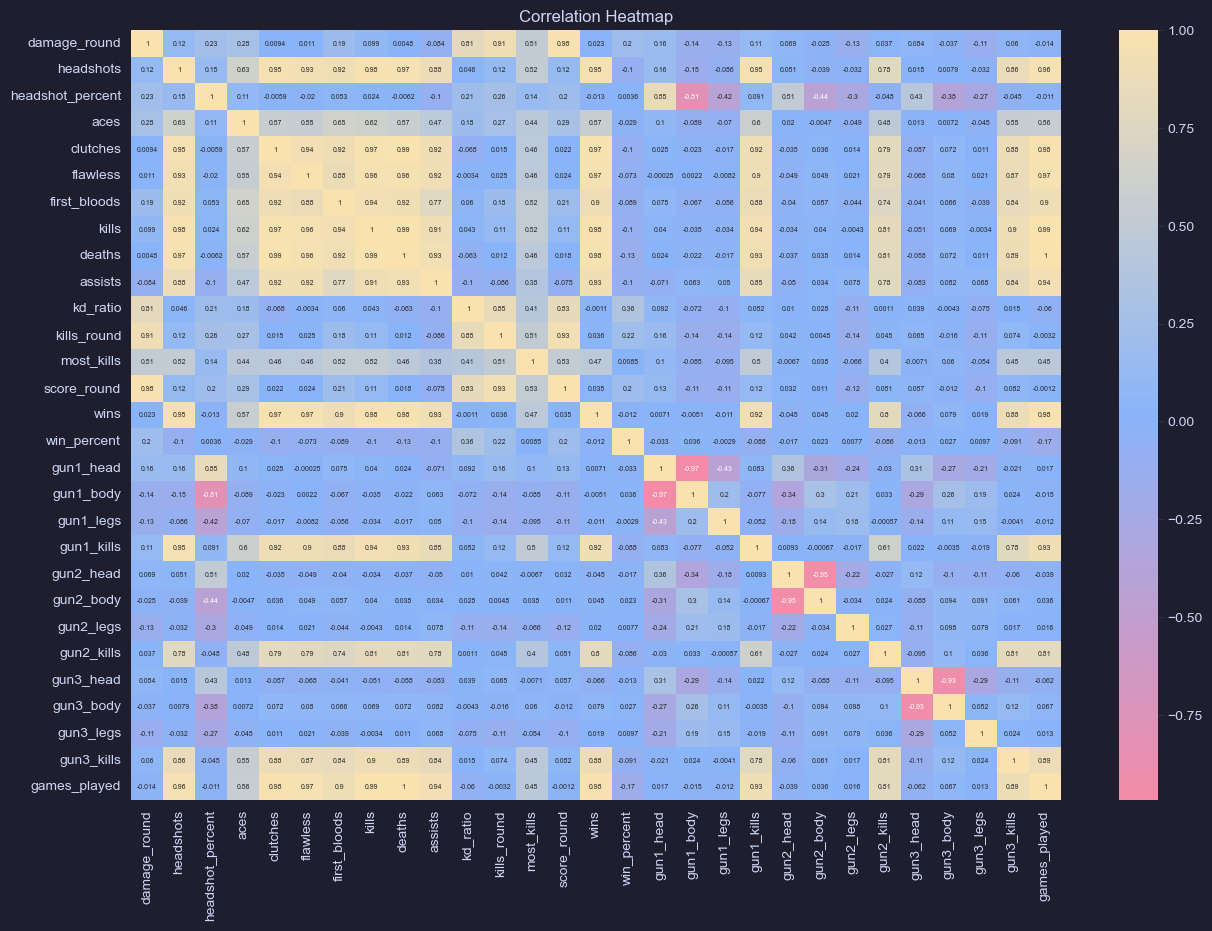

In [239]:
# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Correlation Heatmap')
sns.heatmap(corr_matrix, ax=ax, cmap=cmap, annot=True, annot_kws={'size': 5})
plt.show()

We can see that most of the variable pairs have no correlation at all.

There is an area in the heatmap that is bright yellow.
The variables related are `clutches`, `flawless`, `first_bloods`, `kills`, `deaths`, and `assists`.
Our assumption is that they are all positively correlated because they could be dependent on the amount of matches played.
This is why the variable `wins` is also positively correlated with the variables mentioned above.  

### How correlated are a player's headshot percentage vs. their win percentage?
Let's compare the player's headshot percentage and the player's win percentage.

First, let's create a dataframe with the columns `headshot_percent` and `win_percent`.

In [240]:
# Create a dataframe with the columns 'headshot_percent' and 'win_percent'
headshot_win_df = val_df[['headshot_percent', 'win_percent']]
headshot_win_df

,headshot_percent,win_percent
0,24.9,59.6
1,28.3,65.8
2,24.0,65.6
3,37.3,62.8
4,24.4,62.8
...,...,...
84063,21.4,76.2
84064,30.1,80.0
84065,30.2,52.0
84066,22.2,66.7


Let's plot the dataframe.

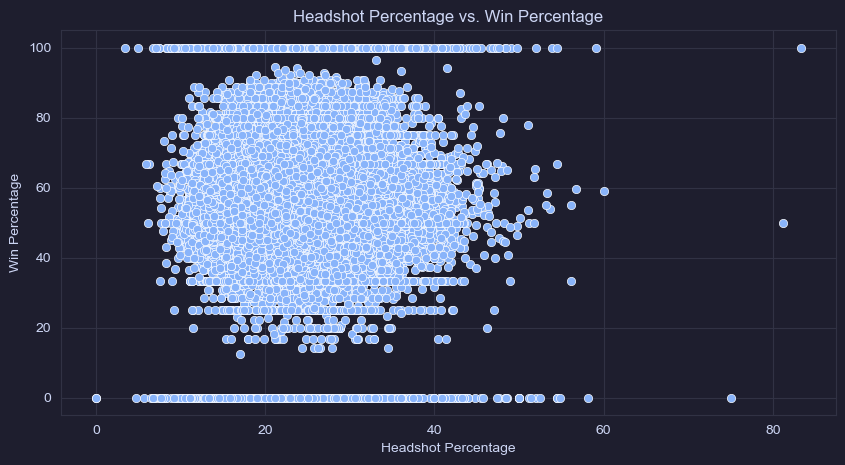

In [241]:
# Plot the dataframe
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=headshot_win_df, x='headshot_percent', y='win_percent', ax=ax)
plt.xlabel('Headshot Percentage')
plt.ylabel('Win Percentage')
plt.title('Headshot Percentage vs. Win Percentage')
plt.show()

From the scatter plot, we can see that there is no correlation between the player's headshot percentage and the player's win percentage.
This means that having a high headshot percentage does not mean that the player will have a high win percentage, and vice versa.

Additionally, we can see that there are a lot of players who have win percentages of 0% and 100%.
Our assumption is that these points may mean that the player has only played one or two games, and those games were either a win or a loss.


### How correlated are a player's average damage per round vs. their win percentage?
Let us check the relationship between the player's average damage per round and the player's win percentage.

In [242]:
# Create a dataframe with the columns 'damage_round' and 'win_percent'
damage_win_df = val_df[['damage_round', 'win_percent']]
damage_win_df

,damage_round,win_percent
0,135.8,59.6
1,170.3,65.8
2,147.5,65.6
3,178.2,62.8
4,149.8,62.8
...,...,...
84063,138.2,76.2
84064,182.9,80.0
84065,158.8,52.0
84066,155.9,66.7


Let's plot the dataframe.

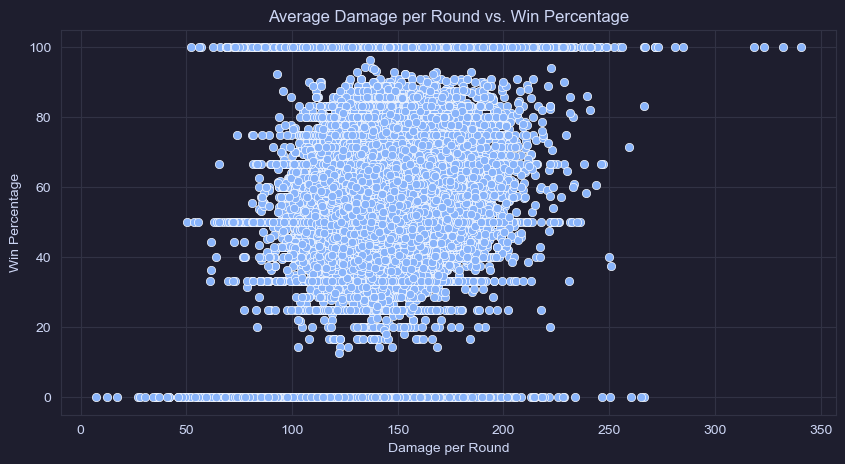

In [243]:
# Plot the dataframe
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=damage_win_df, x='damage_round', y='win_percent', ax=ax)
plt.xlabel('Damage per Round')
plt.ylabel('Win Percentage')
plt.title('Average Damage per Round vs. Win Percentage')
plt.show()

From the scatter plot, we can see that there is no correlation between the player's damage per round and the player's win percentage.
This means that having high damage per round does not mean that the player will have a high win percentage, and vice versa.

Additionally, we can notice that there are a lot of players who have win percentages of 0%, 50%, and 100%.
Our assumption is that these points may mean that the player has only played one or two games.

### How correlated are a player's average damage per round vs. their average kills per round?
Let us check the relationship between the player's average damage per round and the player's average kills per round.

In [244]:
# Create a dataframe with the columns 'damage_round' and 'kills_round'
damage_kills_df = val_df[['damage_round', 'kills_round']]
damage_kills_df

,damage_round,kills_round
0,135.8,0.7
1,170.3,1.0
2,147.5,0.8
3,178.2,1.0
4,149.8,0.8
...,...,...
84063,138.2,0.7
84064,182.9,1.0
84065,158.8,0.9
84066,155.9,0.8


Let's plot the dataframe.

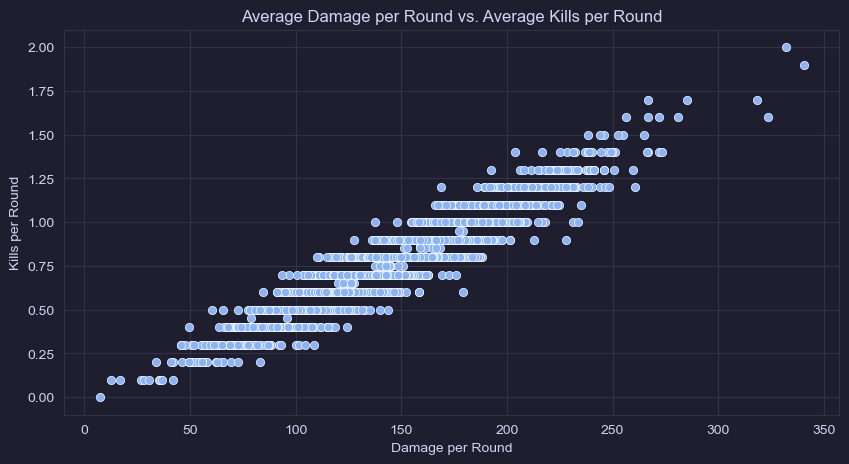

In [245]:
# Plot the dataframe
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=damage_kills_df, x='damage_round', y='kills_round', ax=ax)
plt.xlabel('Damage per Round')
plt.ylabel('Kills per Round')
plt.title('Average Damage per Round vs. Average Kills per Round')
plt.show()

From the scatter plot, we can see that there is a positive correlation between the player's damage per round and the player's kills per round.
Observing high damage per round may mean that the player has high kills per round, and vice versa.

### How correlated are a player's average kills per round vs. their win percentage?
Let us check the relationship between the player's average kills per round and the player's win percentage.

In [246]:
# Create a dataframe with the columns 'kills_round' and 'win_percent'
kills_win_df = val_df[['kills_round', 'win_percent']]
kills_win_df

,kills_round,win_percent
0,0.7,59.6
1,1.0,65.8
2,0.8,65.6
3,1.0,62.8
4,0.8,62.8
...,...,...
84063,0.7,76.2
84064,1.0,80.0
84065,0.9,52.0
84066,0.8,66.7


Let's plot the dataframe.

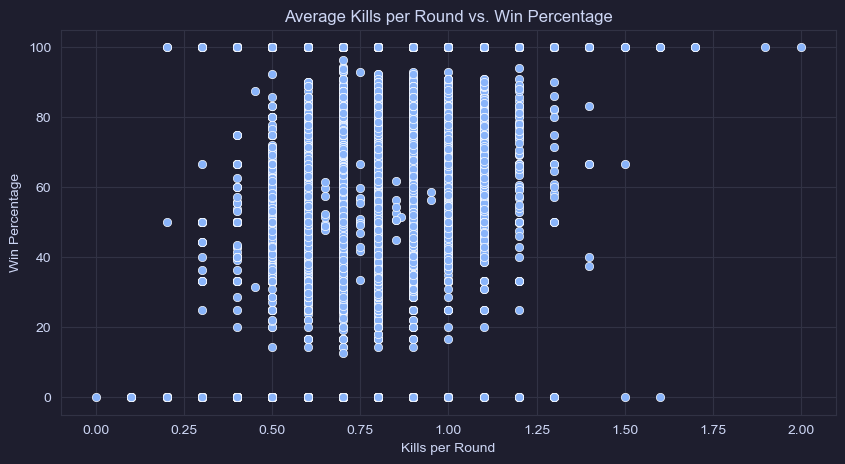

In [247]:
# Plot the dataframe
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=kills_win_df, x='kills_round', y='win_percent', ax=ax)
plt.xlabel('Kills per Round')
plt.ylabel('Win Percentage')
plt.title('Average Kills per Round vs. Win Percentage')
plt.show()

From the scatter plot, we can see that there is no correlation between the player's kills per round and the player's win percentage.
This means that having high number of kills per round does not necessarily mean we will also observe a high win percentage, and vice versa.

### How correlated are a player's kill-death ratio vs. their win percentage?
Let us check the relationship between the player's kill-death ratio and the player's win percentage.

In [248]:
# Create a dataframe with the columns 'kd_ratio' and 'win_percent'
kd_win_df = val_df[['kd_ratio', 'win_percent']]
kd_win_df

,kd_ratio,win_percent
0,1.07,59.6
1,1.35,65.8
2,1.05,65.6
3,1.40,62.8
4,1.11,62.8
...,...,...
84063,1.19,76.2
84064,1.46,80.0
84065,1.25,52.0
84066,1.17,66.7


Let's plot the dataframe.

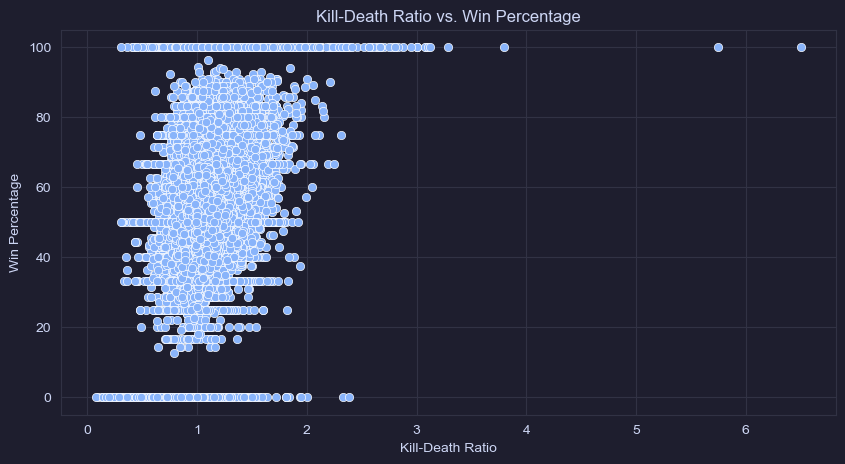

In [249]:
# Plot the dataframe
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=kd_win_df, x='kd_ratio', y='win_percent', ax=ax)
plt.xlabel('Kill-Death Ratio')
plt.ylabel('Win Percentage')
plt.title('Kill-Death Ratio vs. Win Percentage')
plt.show()

From the scatter plot, we can see that there is no correlation between the player's kill-death ratio and the player's win percentage.
This means that having high kill-death ratio does not necessarily mean we will also observe a high win percentage, and vice versa.

### How correlated are a player's average damage per round vs. their average score per round?
Let us check the relationship between the player's average damage per round and the player's average score per round.

In [250]:
# Create a dataframe with the columns 'damage_round' and 'score_round'
damage_score_df = val_df[['damage_round', 'score_round']]
damage_score_df

,damage_round,score_round
0,135.8,208.8
1,170.3,270.6
2,147.5,227.8
3,178.2,277.0
4,149.8,230.9
...,...,...
84063,138.2,210.1
84064,182.9,285.8
84065,158.8,247.9
84066,155.9,235.0


Let's plot the dataframe.

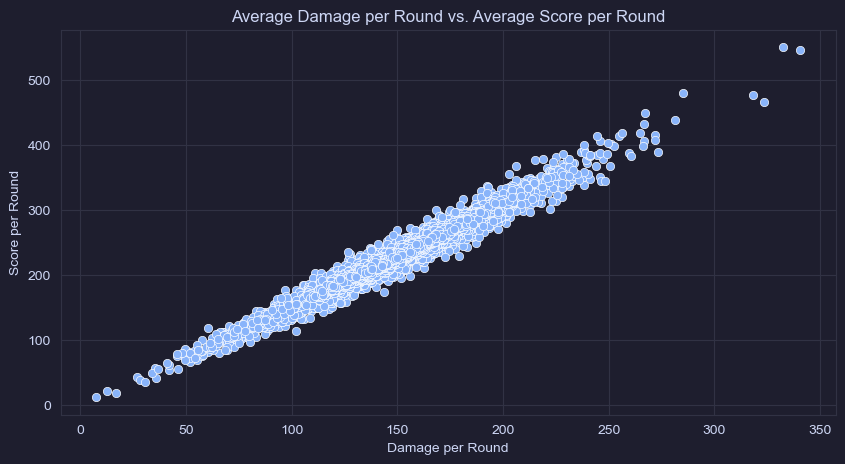

In [251]:
# Plot the dataframe
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=damage_score_df, x='damage_round', y='score_round', ax=ax)
plt.xlabel('Damage per Round')
plt.ylabel('Score per Round')
plt.title('Average Damage per Round vs. Average Score per Round')
plt.show()

From the scatter plot, we can see that there is a positive correlation between the player's damage per round and the player's score per round.
Observing high damage per round means may mean that the player has high score per round, and vice versa.

### How correlated are a player's average kills per round vs. their average score per round?
Let us check the relationship between the player's average kills per round and the player's average score per round.

In [252]:
# Create a dataframe with the columns 'kills_round' and 'score_round'
kills_score_df = val_df[['kills_round', 'score_round']]
kills_score_df

,kills_round,score_round
0,0.7,208.8
1,1.0,270.6
2,0.8,227.8
3,1.0,277.0
4,0.8,230.9
...,...,...
84063,0.7,210.1
84064,1.0,285.8
84065,0.9,247.9
84066,0.8,235.0


Let's plot the dataframe.

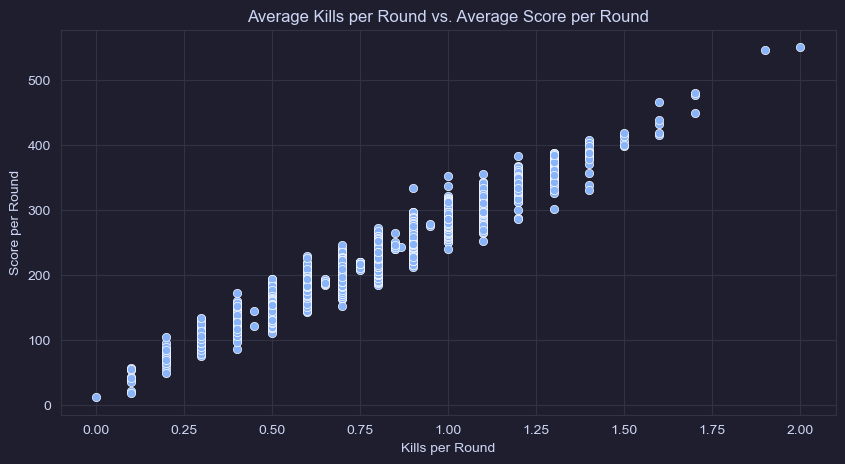

In [253]:
# Plot the dataframe
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=kills_score_df, x='kills_round', y='score_round', ax=ax)
plt.xlabel('Kills per Round')
plt.ylabel('Score per Round')
plt.title('Average Kills per Round vs. Average Score per Round')
plt.show()

From the scatter plot, we can see that there is a positive correlation between the player's kills per round and the player's score per round.
Observing high kills per round means may mean that the player has high score per round, and vice versa.

### How correlated are a player's kill-death ratio vs. their average score per round?
Let us check the relationship between the player's kill-death ratio and the player's average score per round.

In [254]:
# Create a dataframe with the columns 'kd_ratio' and 'score_round'
kd_score_df = val_df[['kd_ratio', 'score_round']]
kd_score_df

,kd_ratio,score_round
0,1.07,208.8
1,1.35,270.6
2,1.05,227.8
3,1.40,277.0
4,1.11,230.9
...,...,...
84063,1.19,210.1
84064,1.46,285.8
84065,1.25,247.9
84066,1.17,235.0


Let's plot the dataframe.

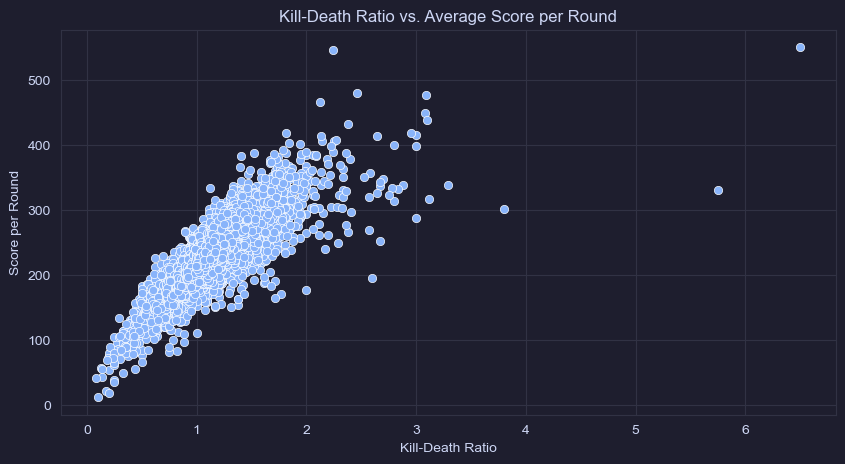

In [255]:
# Plot the dataframe
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=kd_score_df, x='kd_ratio', y='score_round', ax=ax)
plt.xlabel('Kill-Death Ratio')
plt.ylabel('Score per Round')
plt.title('Kill-Death Ratio vs. Average Score per Round')
plt.show()

From the scatter plot, we can see that there is a positive correlation between the player's kill-death ratio and the player's score per round.
Observing high kill-death ratio means may mean that the player has high score per round, and vice versa.

### How correlated are a player's average score per round vs. their win percentage?
Let us check the relationship between the player's average score per round and the player's win percentage.

In [256]:
# Create a dataframe with the columns 'score_round' and 'win_percent'
score_win_df = val_df[['score_round', 'win_percent']]
score_win_df

,score_round,win_percent
0,208.8,59.6
1,270.6,65.8
2,227.8,65.6
3,277.0,62.8
4,230.9,62.8
...,...,...
84063,210.1,76.2
84064,285.8,80.0
84065,247.9,52.0
84066,235.0,66.7


Let's plot the dataframe.

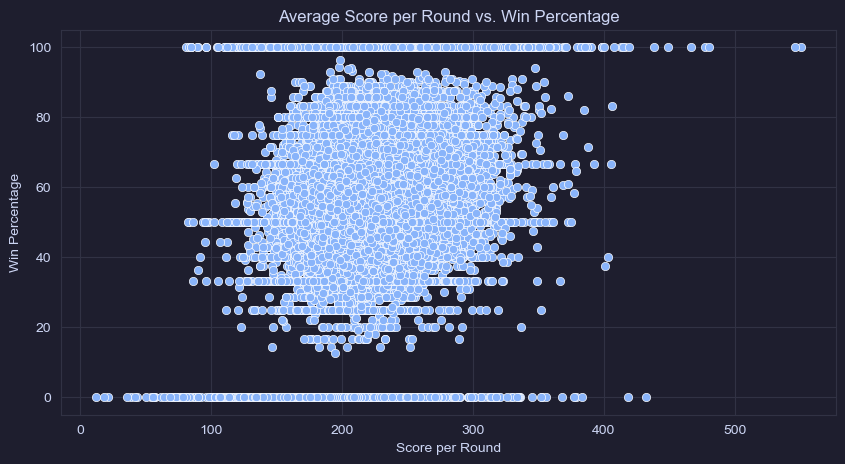

In [257]:
# Plot the dataframe
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=score_win_df, x='score_round', y='win_percent', ax=ax)
plt.xlabel('Score per Round')
plt.ylabel('Win Percentage')
plt.title('Average Score per Round vs. Win Percentage')
plt.show()

From the scatter plot, we can see that there is no correlation between the player's score per round and the player's win percentage.
This means that having high score per round does not necessarily mean we will also observe a high win percentage, and vice versa.

Additionally, in relation to the previous scatter plots, we cannot seem to find any correlation against the player's win percentage,
which is a bit surprising since we would expect that the player's win percentage would be correlated to the player's performance.
However, this may be due to the fact that the player's win percentage is dependent on the player's teammates' performance as well.
This could also be due to the fact that the player's win percentage is dependent on the player's opponents' performance as well.
There are just a lot of factors that could affect the player's win percentage.

## Comparison Between Groups of Observations
We can find relationships between groups of observations.
Some relevant groups could be their rank (`rating`), different regions, and their most-used agent type.

First, let's establish the different groups.

In [258]:
# Group the dataframe by rank. Filter out ranks that are not Immortal or Radiant since other ranks are only less than 1% of the dataset.
rank_df = val_df[(val_df['rating'] == 'Radiant') | (val_df['rating'] == 'Immortal 1') | (val_df['rating'] == 'Immortal 2') | (val_df['rating'] == 'Immortal 3')]
rank_group = rank_df.groupby('rating')

# Group the dataframe by region
region_group = val_df.groupby('region')

# Group the dataframe by agent type
agent_type_group = val_df.groupby('agent_1_type')

### Average Damage per Round
Let's compare the average damage per round of the different groups.

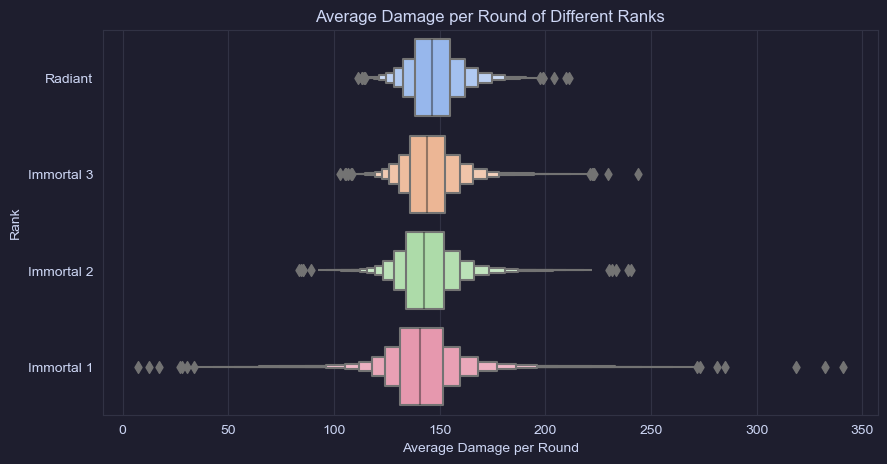

In [259]:
# Use a boxen plot to compare the average damage per round of the different ranks
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxenplot(x='damage_round', y='rating', data=rank_df, ax=ax, order=['Radiant', 'Immortal 3', 'Immortal 2', 'Immortal 1'])
plt.xlabel('Average Damage per Round')
plt.ylabel('Rank')
plt.title('Average Damage per Round of Different Ranks')
plt.show()

The difference between the average damage per round of the different ranks is not that visible.
Let's try plotting it with a different type of plot.

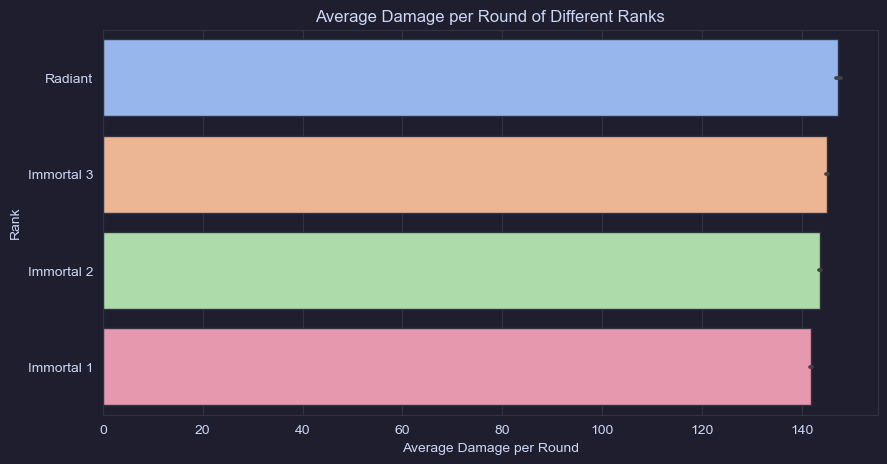

In [260]:
# Use a bar plot to compare the average damage per round of the different ranks
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='damage_round', y='rating', data=rank_df, ax=ax, order=['Radiant', 'Immortal 3', 'Immortal 2', 'Immortal 1'])
plt.xlabel('Average Damage per Round')
plt.ylabel('Rank')
plt.title('Average Damage per Round of Different Ranks')
plt.show()

Based on the bar plot, we can see that the average damage per round of the Radiant players is higher than the average damage per round of the Immortal players.

Let's try plotting the average damage per round of the different regions.

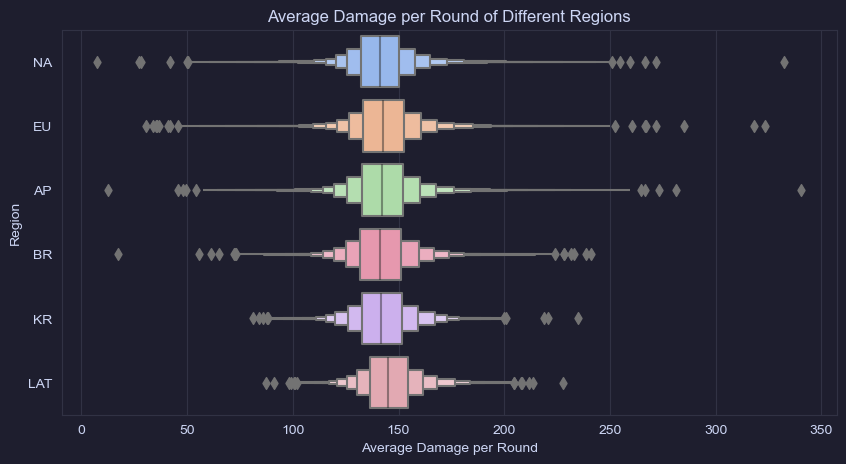

In [261]:
# Use a boxen plot to compare the average damage per round of the different regions
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxenplot(x='damage_round', y='region', data=val_df, ax=ax)
plt.xlabel('Average Damage per Round')
plt.ylabel('Region')
plt.title('Average Damage per Round of Different Regions')
plt.show()

The difference between the average damage per round of the different regions is not that visible.
Let's try plotting it with a different type of plot.

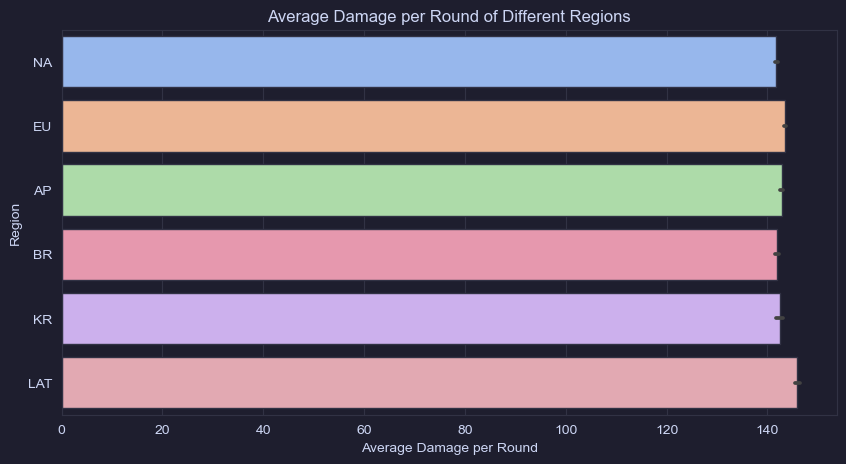

In [262]:
# Use a bar plot to compare the average damage per round of the different regions
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='damage_round', y='region', data=val_df, ax=ax)
plt.xlabel('Average Damage per Round')
plt.ylabel('Region')
plt.title('Average Damage per Round of Different Regions')
plt.show()

Based on the bar plot, we can see that the average damage per round of the players from the region LATAM is higher than the average damage per round of the players from the other regions.

Let's try plotting the average damage per round of the different agent types.

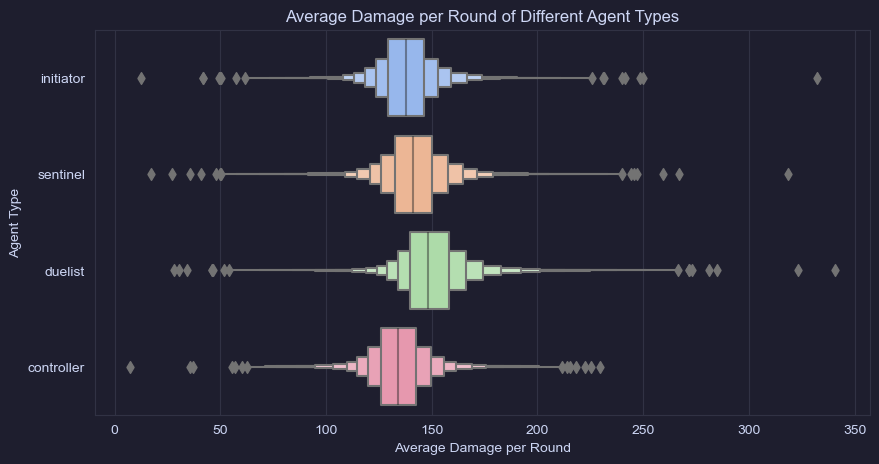

In [263]:
# Use a boxen plot to compare the average damage per round of the different agent types
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxenplot(x='damage_round', y='agent_1_type', data=val_df, ax=ax)
plt.xlabel('Average Damage per Round')
plt.ylabel('Agent Type')
plt.title('Average Damage per Round of Different Agent Types')
plt.show()

This time, the difference between the average damage per round of the different agent types is visible.
Duelists have the highest average damage per round, while Controllers have the lowest average damage per round.

Let us plot total kills of different agent types

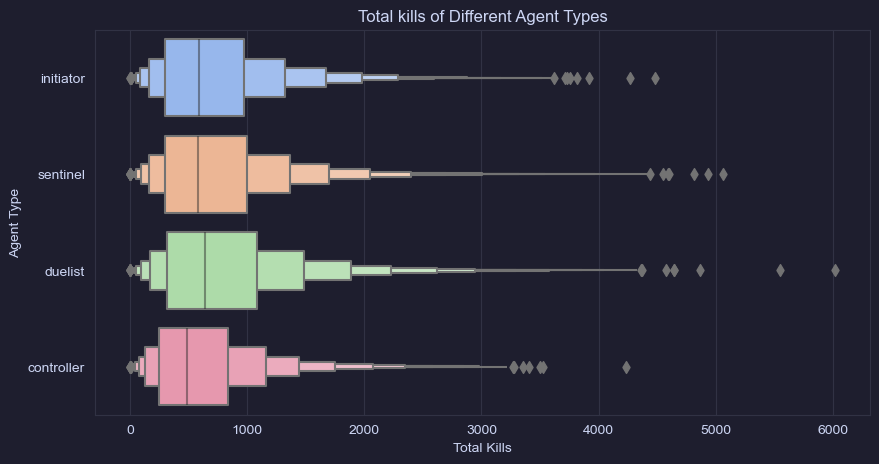

In [264]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.boxenplot(x='kills', y='agent_1_type', data=val_df, ax=ax)
plt.xlabel('Total Kills')
plt.ylabel('Agent Type')
plt.title('Total kills of Different Agent Types')
plt.show()

We can observe that duelists have the most kills, while controllers have the lowest total kills.

## Testing of Personal Assumptions

### Assumption 1: Player's headshot percentage is positively correlated to their win percentage.

- **Finding**: From the section "How correlated are a player's headshot percentage vs. their win percentage" under Exploratory Data Analysis, there is no correlation.
- **Implication**: This means that having a high headshot percentage does not necessarily result in a high win percentage, and vice versa.

### Assumption 2: Player's average damage per round is positively correlated to their win percentage.

- **Finding**: From the section "How correlated are a player's average damage per round vs. their win percentage" under Exploratory Data Analysis, there is no correlation.
- **Implication**: This means that having a high average damage per round does not necessarily result in a high win percentage, and vice versa.

### Assumption 3: Player's average damage per round is positively correlated to their average kills per round.

- **Finding**: From the section "How correlated are a player's average damage per round vs. their average kills per round" under Exploratory Data Analysis, there is a positive correlation.
- **Implication**: This means that having a high average damage per round is associated with having a high average kills per round, and vice versa.

### Assumption 4: Player's average kills per round is positively correlated to their win percentage.

- **Finding**: From the section "How correlated are a player's average kills per round vs. their win percentage" under Exploratory Data Analysis, there is no correlation.
- **Implication**: This means that having a high average kills per round does not necessarily result in a high win percentage, and vice versa.

### Assumption 5: Player's kill-death ratio is positively correlated to their win percentage.

- **Finding**: From the section "How correlated are a player's kill-death ratio vs. their win percentage" under Exploratory Data Analysis, there is no correlation.
- **Implication**: This means that having a high kill-death ratio does not necessarily result in a high win percentage, and vice versa.

### Assumption 6: Player's average damage per round is positively correlated to their average score per round.

- **Finding**: From the section "How correlated are a player's average damage per round vs. their average score per round" under Exploratory Data Analysis, there is a positive correlation.
- **Implication**: This means that having a high average damage per round is associated with having a high average score per round, and vice versa.

### Assumption 7: Player's average kills per round is positively correlated to their average score per round.

- **Finding**: From the section "How correlated are a player's average kills per round vs. their average score per round" under Exploratory Data Analysis, there is a positive correlation.
- **Implication**: This means that having a high average kills per round is associated with having a high average score per round, and vice versa.

### Assumption 8: Player's kill-death ratio is positively correlated to their average score per round.

- **Finding**: From the section "How correlated are a player's kill-death ratio vs. their average score per round" under Exploratory Data Analysis, there is a positive correlation.
- **Implication**: This means that having a high kill-death ratio is associated with having a high average score per round, and vice versa.

### Assumption 9: Player's average score per round is positively correlated to their win percentage.

- **Finding**: From the section "How correlated are a player's average score per round vs. their win percentage" under Exploratory Data Analysis, there is no correlation.
- **Implication**: This means that having a high average score per round does not necessarily result in a high win percentage, and vice versa.



## Research Questions
What are the patterns manifested by each group of high-elo players, and how can these patterns be qualitatively described?

insert explanation

# Data Modelling

## Sampling

**Parameters determining the sample size**

Confidence level: 95%
Population size: 84,065
Margin of Error: 5%
Standard dev: 50% (default?) 


In [265]:
z_score_95 = 1.96
me = 0.05
sample_std = 0.5

# Determine sample size
n = int((np.square(z_score_95) *  sample_std * (1 - sample_std)) / np.square(me))
n

384

In [266]:
val_sample_df = val_df.sample(n, random_state=12)
val_sample_df

,region,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,...,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,agent_1_type,agent_2_type,agent_3_type,games_played
69807,AP,Immortal 1,152.80,348,15.90,1,49,39,62,645,...,74,Spectre,16,78,6,50,controller,controller,controller,37.0
16607,NA,Immortal 2,140.20,965,22.40,0,154,72,282,1499,...,433,Sheriff,48,50,2,133,duelist,duelist,initiator,99.0
37644,EU,Immortal 3,115.90,247,20.10,1,53,40,73,421,...,70,Spectre,20,73,6,38,sentinel,sentinel,sentinel,33.0
74118,BR,Immortal 2,141.85,1011,26.25,2,131,80,155,1485,...,422,Ghost,36,60,4,86,sentinel,initiator,sentinel,92.5
52166,EU,Immortal 1,147.10,580,23.40,1,97,44,198,917,...,165,Spectre,26,68,6,94,duelist,duelist,initiator,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,NA,Immortal 1,133.60,550,18.40,0,89,49,116,880,...,156,Spectre,16,78,7,123,initiator,duelist,controller,64.0
2621,NA,Immortal 1,121.70,218,20.60,0,42,19,38,366,...,71,Spectre,18,79,3,33,sentinel,sentinel,controller,27.0
22082,EU,Immortal 2,125.50,514,20.10,0,97,60,92,884,...,118,Spectre,26,63,11,70,initiator,sentinel,sentinel,63.0
24436,EU,Immortal 1,127.80,767,22.60,0,127,71,90,1185,...,351,Spectre,25,70,5,126,sentinel,sentinel,sentinel,85.0


In [267]:
sample_region_count = val_sample_df['region'].value_counts()
sample_region_count

region
EU     144
NA     110
AP      85
BR      25
LAT     14
KR       6
Name: count, dtype: int64

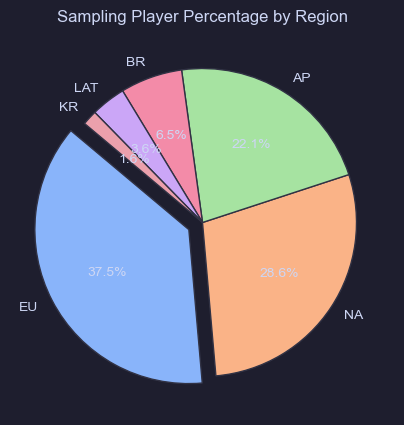

In [268]:
plt.figure(figsize=(5, 5))
plt.pie(sample_region_count, labels=region_count.index, autopct='%1.1f%%', startangle=140, explode=(0.1, 0, 0, 0, 0, 0))
plt.title('Sampling Player Percentage by Region')

plt.show()

In [269]:
player_ratios = region_count / len(val_df)

# Test for Goodness of Fit
observed = sample_region_count
expected = np.round(player_ratios * len(val_sample_df), decimals=1)
chi2, p_value = chisquare(f_obs=observed, f_exp=expected)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

# Define the significance level (alpha)
alpha = 0.05

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between observed and expected frequencies.")
else:
    print("Do not reject the null hypothesis: There is no significant difference between observed and expected frequencies.")

Chi-square statistic: 5.680019890675206
P-value: 0.33860945268285175
Do not reject the null hypothesis: There is no significant difference between observed and expected frequencies.


### Player Ratings

In [270]:
sample_rating_count = val_sample_df['rating'].value_counts()
sample_rating_count

rating
Immortal 1    225
Immortal 2     97
Immortal 3     50
Radiant        12
Diamond 3       0
Gold 3          0
Diamond 1       0
Silver 3        0
Silver 1        0
Platinum 2      0
Platinum 1      0
Bronze 2        0
Diamond 2       0
Bronze 3        0
Gold 1          0
Unrated         0
Silver 2        0
Gold 2          0
Platinum 3      0
Name: count, dtype: int64

In [271]:
sample_ratings_count = val_sample_df['rating'].value_counts()
others_count = sample_ratings_count.sum() - (sample_ratings_count['Immortal 3'] + sample_ratings_count['Immortal 2'] + sample_ratings_count['Immortal 1'] + sample_ratings_count['Radiant'])
data = {
    'Category': ['Others', 'Immortal 3', 'Immortal 2', 'Immortal 1', 'Radiant'],
    'Count': [others_count, sample_ratings_count.get('Immortal 3', 0),
              sample_ratings_count.get('Immortal 2', 0), sample_ratings_count.get('Immortal 1', 0),
              sample_ratings_count.get('Radiant', 0)]
}
sample_ratings_count = pd.DataFrame(data)
sample_ratings_count

,Category,Count
0,Others,0
1,Immortal 3,50
2,Immortal 2,97
3,Immortal 1,225
4,Radiant,12


In [272]:
player_ratios = ratings_count['Count'] / len(val_df)

# Test for Goodness of Fit
observed = sample_ratings_count['Count']
expected = np.round(player_ratios * len(val_sample_df), decimals=2)

# Added a wrapper to account for overflow
chisquare(f_obs=observed, f_exp=np.sum(observed)/np.sum(expected) * expected)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

# Define the significance level (alpha)
alpha = 0.05

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between observed and expected frequencies.")
else:
    print("Do not reject the null hypothesis: There is no significant difference between observed and expected frequencies.")

Chi-square statistic: 5.680019890675206
P-value: 0.33860945268285175
Do not reject the null hypothesis: There is no significant difference between observed and expected frequencies.
